In [2]:

import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import scipy as sp
import seaborn as sns

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML




C:\Users\mailm_000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mailm_000\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load in data

In [3]:
data=pd.read_csv('data.csv', low_memory=False)

## Look at structure of data

In [4]:
data.head(8)

,Req Delv Dt,Cust Hier1,Shipt Orig Appt Date,Shipt Orig Appt Time,Shipt Origin Appt Date Orig,Shipt Origin Appt Time Orig,Shipment Origin Appt Reason,Shipt Dest Appt Date,Shipt Dest Appt Time,Shipt Dest Appt Date Orig,...,Declined,% Declined,Rejected,% Rejected,Expired,% Expired,1st Tender Accepted,% 1st Tender Accepted,Average Carrier Response (Min),Carrier Type
0,3/24/2017,C001,3/23/2017,10:00 AM,3/23/2017,10:00 AM,NA-Normal Appointment,3/24/2017,10:00 AM,3/24/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,3.950000,Primary
1,3/22/2017,T002,NaN,NaN,NaN,NaN,NaN,3/22/2017,2:00 PM,3/22/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,20.816667,Primary
2,3/26/2017,T002,3/24/2017,11:00 AM,3/24/2017,11:00 AM,NA-Normal Appointment,3/26/2017,11:30 PM,3/26/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,38.766667,Primary
3,3/22/2017,C001,3/20/2017,11:00 AM,3/20/2017,11:00 AM,NA-Normal Appointment,3/22/2017,5:00 AM,3/22/2017,...,1,1.0,0,0.0,0,0.0,No,0,9.216667,Secondary
4,3/22/2017,C001,3/20/2017,11:00 AM,3/20/2017,11:00 AM,NA-Normal Appointment,3/22/2017,5:00 AM,3/22/2017,...,0,0.0,0,0.0,0,0.0,No,0,9.216667,Secondary
5,3/22/2017,C001,3/20/2017,11:00 AM,3/20/2017,11:00 AM,NA-Normal Appointment,3/22/2017,5:00 AM,3/22/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,9.216667,Secondary
6,3/22/2017,D003,3/21/2017,3:05 PM,3/21/2017,3:05 PM,NA-Normal Appointment,3/22/2017,7:00 AM,3/22/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,17.600000,Primary
7,3/21/2017,C001,3/20/2017,3:05 PM,3/20/2017,3:05 PM,NA-Normal Appointment,3/21/2017,6:00 AM,3/21/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,0.000000,Primary


In [5]:
data.tail()

,Req Delv Dt,Cust Hier1,Shipt Orig Appt Date,Shipt Orig Appt Time,Shipt Origin Appt Date Orig,Shipt Origin Appt Time Orig,Shipment Origin Appt Reason,Shipt Dest Appt Date,Shipt Dest Appt Time,Shipt Dest Appt Date Orig,...,Declined,% Declined,Rejected,% Rejected,Expired,% Expired,1st Tender Accepted,% 1st Tender Accepted,Average Carrier Response (Min),Carrier Type
72902,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,1,1.0,0,0.0,0,0.000000,No,0,907.641667,Secondary
72903,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,0,0.0,0,0.0,0,0.000000,No,0,907.641667,Secondary
72904,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,0,0.0,0,0.0,0,0.000000,No,0,907.641667,Secondary
72905,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,0,0.0,0,0.0,1,1.000000,No,0,907.641667,Secondary
72906,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,0,0.0,0,0.0,1,0.333333,No,0,907.641667,Primary


In [6]:
data.columns

Index(['Req Delv Dt', 'Cust Hier1', 'Shipt Orig Appt Date',
       'Shipt Orig Appt Time', 'Shipt Origin Appt Date Orig ',
       'Shipt Origin Appt Time Orig', 'Shipment Origin Appt Reason',
       'Shipt Dest Appt Date', 'Shipt Dest Appt Time',
       'Shipt Dest Appt Date Orig', 'Shipt Dest Appt Time Orig',
       'Shipment Destination Appt Reason', 'Shipt Planned Departure Date',
       'Shipt Planned Departure Time', 'Shipt Planned Arrival Date',
       'Shipt Planned Arrival Time', 'Shipt Arrive at Origin Date',
       'Shipt Arrive at Origin Time', 'Shipment Arrive Origin Reason',
       'Shipt Depart Origin Date', 'Shipt Depart Origin Time',
       'Shipt Arrive at Dest Date', 'Shipt Arrive at Dest Time',
       'Shipment Arrive Destination Reason', 'Shipment Weight (lb)',
       'Shipment Volume (cubic ft)', 'Shipment Loaded Miles', 'Order #',
       'Stop Number', 'TRANSPORT_MODE', 'ORG_ZIP_FN', 'DEST_ZP_FN',
       'ORGIN_APPOINT_REA_CODE_FN', 'DEST_APPOINT_REA_CODE_FN',
   

In [7]:
data.dtypes

Req Delv Dt                            object
Cust Hier1                             object
Shipt Orig Appt Date                   object
Shipt Orig Appt Time                   object
Shipt Origin Appt Date Orig            object
Shipt Origin Appt Time Orig            object
Shipment Origin Appt Reason            object
Shipt Dest Appt Date                   object
Shipt Dest Appt Time                   object
Shipt Dest Appt Date Orig              object
Shipt Dest Appt Time Orig              object
Shipment Destination Appt Reason       object
Shipt Planned Departure Date           object
Shipt Planned Departure Time           object
Shipt Planned Arrival Date             object
Shipt Planned Arrival Time             object
Shipt Arrive at Origin Date            object
Shipt Arrive at Origin Time            object
Shipment Arrive Origin Reason          object
Shipt Depart Origin Date               object
Shipt Depart Origin Time               object
Shipt Arrive at Dest Date         

In [8]:
data.shape

(72907, 67)

In [9]:
data.columns = data.columns.str.replace(' ', '_')


In [10]:
data.columns

Index(['Req_Delv_Dt', 'Cust_Hier1', 'Shipt_Orig_Appt_Date',
       'Shipt_Orig_Appt_Time', 'Shipt_Origin_Appt_Date_Orig_',
       'Shipt_Origin_Appt_Time_Orig', 'Shipment_Origin_Appt_Reason',
       'Shipt_Dest_Appt_Date', 'Shipt_Dest_Appt_Time',
       'Shipt_Dest_Appt_Date_Orig', 'Shipt_Dest_Appt_Time_Orig',
       'Shipment_Destination_Appt_Reason', 'Shipt_Planned_Departure_Date',
       'Shipt_Planned_Departure_Time', 'Shipt_Planned_Arrival_Date',
       'Shipt_Planned_Arrival_Time', 'Shipt_Arrive_at_Origin_Date',
       'Shipt_Arrive_at_Origin_Time', 'Shipment_Arrive_Origin_Reason',
       'Shipt_Depart_Origin_Date', 'Shipt_Depart_Origin_Time',
       'Shipt_Arrive_at_Dest_Date', 'Shipt_Arrive_at_Dest_Time',
       'Shipment_Arrive_Destination_Reason', 'Shipment_Weight_(lb)',
       'Shipment_Volume_(cubic_ft)', 'Shipment_Loaded_Miles', 'Order_#',
       'Stop_Number', 'TRANSPORT_MODE', 'ORG_ZIP_FN', 'DEST_ZP_FN',
       'ORGIN_APPOINT_REA_CODE_FN', 'DEST_APPOINT_REA_CODE_FN',
   

In [11]:
#look at missing data
data.isnull().sum()

Req_Delv_Dt                              14
Cust_Hier1                                0
Shipt_Orig_Appt_Date                  14708
Shipt_Orig_Appt_Time                  14708
Shipt_Origin_Appt_Date_Orig_          14708
Shipt_Origin_Appt_Time_Orig           14708
Shipment_Origin_Appt_Reason           14758
Shipt_Dest_Appt_Date                    107
Shipt_Dest_Appt_Time                    107
Shipt_Dest_Appt_Date_Orig               343
Shipt_Dest_Appt_Time_Orig               343
Shipment_Destination_Appt_Reason        925
Shipt_Planned_Departure_Date              0
Shipt_Planned_Departure_Time              0
Shipt_Planned_Arrival_Date                0
Shipt_Planned_Arrival_Time                0
Shipt_Arrive_at_Origin_Date             174
Shipt_Arrive_at_Origin_Time             174
Shipment_Arrive_Origin_Reason           315
Shipt_Depart_Origin_Date                  3
Shipt_Depart_Origin_Time                  3
Shipt_Arrive_at_Dest_Date                38
Shipt_Arrive_at_Dest_Time       

In [12]:
#look at percentage of missing data
data.isnull().sum()* 100 / len(data)

## will need to determine what to do with missing data. Perhaps use the average value after
##converting date and time to day of the week and part of the day

Req_Delv_Dt                            0.019203
Cust_Hier1                             0.000000
Shipt_Orig_Appt_Date                  20.173646
Shipt_Orig_Appt_Time                  20.173646
Shipt_Origin_Appt_Date_Orig_          20.173646
Shipt_Origin_Appt_Time_Orig           20.173646
Shipment_Origin_Appt_Reason           20.242226
Shipt_Dest_Appt_Date                   0.146762
Shipt_Dest_Appt_Time                   0.146762
Shipt_Dest_Appt_Date_Orig              0.470462
Shipt_Dest_Appt_Time_Orig              0.470462
Shipment_Destination_Appt_Reason       1.268740
Shipt_Planned_Departure_Date           0.000000
Shipt_Planned_Departure_Time           0.000000
Shipt_Planned_Arrival_Date             0.000000
Shipt_Planned_Arrival_Time             0.000000
Shipt_Arrive_at_Origin_Date            0.238660
Shipt_Arrive_at_Origin_Time            0.238660
Shipment_Arrive_Origin_Reason          0.432057
Shipt_Depart_Origin_Date               0.004115
Shipt_Depart_Origin_Time               0

In [13]:
#lets look at descriptive statistics of the numerical data
data.describe()

#Issue found is that there is a negative min value for the response time. How is that possible?

,Shipment_Weight_(lb),Shipment_Volume_(cubic_ft),Shipment_Loaded_Miles,Order_#,Stop_Number,ORG_ZIP_FN,DEST_ZP_FN,Origin_Zip,SID,Loads_/_Lane,...,Withdrawn,%_Withdrawn,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,%_1st_Tender_Accepted,Average_Carrier_Response_(Min)
count,72907.000000,72907.000000,72907.000000,7.290700e+04,72907.000000,72907.000000,72907.000000,72907.000000,7.290700e+04,72907.000000,...,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000
mean,41847.979528,1906.513395,418.380156,2.063440e+07,2.055962,57889.059473,55449.645425,57889.059473,4.460002e+14,10.346729,...,0.071187,0.063307,0.178200,0.156624,0.002496,0.001644,0.077427,0.064400,0.708423,59.298377
std,6769.174989,707.895645,395.609302,1.227447e+07,0.280339,27024.328190,29898.277210,27024.328190,3.055858e+06,13.894742,...,0.264708,0.237834,0.437534,0.358902,0.057797,0.037467,0.298818,0.238909,0.454492,219.572210
min,2821.120000,180.520000,2.000000,4.647809e+06,2.000000,21001.000000,1089.000000,21001.000000,4.460002e+14,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.183333
25%,43286.600000,1336.960000,156.000000,4.871518e+06,2.000000,30213.000000,29353.000000,30213.000000,4.460002e+14,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.616667
50%,44205.000000,1971.940000,307.000000,3.005805e+07,2.000000,60484.000000,49053.000000,60484.000000,4.460002e+14,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.783333
75%,44730.982000,2501.810000,570.000000,3.020613e+07,2.000000,77020.000000,85224.000000,77020.000000,4.460002e+14,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.175000
max,46527.520000,3603.360000,2723.000000,3.034522e+07,5.000000,97477.000000,98424.000000,97477.000000,4.460002e+14,188.000000,...,3.000000,1.000000,7.000000,1.000000,5.000000,1.000000,6.000000,1.000000,1.000000,3819.333333


## Convert dates to proper date formats

In [14]:
data.Req_Delv_Dt.head()

0    3/24/2017
1    3/22/2017
2    3/26/2017
3    3/22/2017
4    3/22/2017
Name: Req_Delv_Dt, dtype: object

In [15]:
data['Req_Delv_Dt'] = pd.to_datetime(data.Req_Delv_Dt)

data['Shipt_Orig_Appt_Date'] = pd.to_datetime(data.Shipt_Orig_Appt_Date)


data['Shipt_Origin_Appt_Date_Orig_'] = pd.to_datetime(data.Shipt_Origin_Appt_Date_Orig_)

data['Shipt_Dest_Appt_Date'] = pd.to_datetime(data.Shipt_Dest_Appt_Date)


data['Shipt_Dest_Appt_Date_Orig'] = pd.to_datetime(data.Shipt_Dest_Appt_Date_Orig)

data['Shipt_Planned_Departure_Date'] = pd.to_datetime(data.Shipt_Planned_Departure_Date)

data['Shipt_Planned_Arrival_Date'] = pd.to_datetime(data.Shipt_Planned_Arrival_Date)

data['Shipt_Arrive_at_Origin_Date'] = pd.to_datetime(data.Shipt_Arrive_at_Origin_Date)

data['Shipt_Depart_Origin_Date'] = pd.to_datetime(data.Shipt_Depart_Origin_Date)

data['Shipt_Arrive_at_Dest_Date'] = pd.to_datetime(data.Shipt_Arrive_at_Dest_Date)






In [16]:
data.dtypes

Req_Delv_Dt                           datetime64[ns]
Cust_Hier1                                    object
Shipt_Orig_Appt_Date                  datetime64[ns]
Shipt_Orig_Appt_Time                          object
Shipt_Origin_Appt_Date_Orig_          datetime64[ns]
Shipt_Origin_Appt_Time_Orig                   object
Shipment_Origin_Appt_Reason                   object
Shipt_Dest_Appt_Date                  datetime64[ns]
Shipt_Dest_Appt_Time                          object
Shipt_Dest_Appt_Date_Orig             datetime64[ns]
Shipt_Dest_Appt_Time_Orig                     object
Shipment_Destination_Appt_Reason              object
Shipt_Planned_Departure_Date          datetime64[ns]
Shipt_Planned_Departure_Time                  object
Shipt_Planned_Arrival_Date            datetime64[ns]
Shipt_Planned_Arrival_Time                    object
Shipt_Arrive_at_Origin_Date           datetime64[ns]
Shipt_Arrive_at_Origin_Time                   object
Shipment_Arrive_Origin_Reason                 

In [17]:
data.head(8)

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,0,0.0,0,0.0,0,0.0,Yes,1,3.950000,Primary
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,0,0.0,0,0.0,0,0.0,Yes,1,20.816667,Primary
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,0,0.0,0,0.0,0,0.0,Yes,1,38.766667,Primary
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,1,1.0,0,0.0,0,0.0,No,0,9.216667,Secondary
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.0,No,0,9.216667,Secondary
5,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.0,Yes,1,9.216667,Secondary
6,2017-03-22,D003,2017-03-21,3:05 PM,2017-03-21,3:05 PM,NA-Normal Appointment,2017-03-22,7:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.0,Yes,1,17.600000,Primary
7,2017-03-21,C001,2017-03-20,3:05 PM,2017-03-20,3:05 PM,NA-Normal Appointment,2017-03-21,6:00 AM,2017-03-21,...,0,0.0,0,0.0,0,0.0,Yes,1,0.000000,Primary


In [18]:
#Lets inspect the max dates for any issues
max_per_col = data.max(axis=0)
max_per_col

#These are issues from the results- dates far into the future
#Shipt_Dest_Appt_Date                    2021-02-22 00:00:00
#Shipt_Dest_Appt_Date_Orig               2041-02-22 00:00:00


Req_Delv_Dt                       2017-03-31 00:00:00
Cust_Hier1                                       T002
Shipt_Orig_Appt_Date              2017-11-24 00:00:00
Shipt_Origin_Appt_Date_Orig_      2017-03-30 00:00:00
Shipt_Dest_Appt_Date              2021-02-22 00:00:00
Shipt_Dest_Appt_Date_Orig         2041-02-22 00:00:00
Shipt_Planned_Departure_Date      2017-12-29 00:00:00
Shipt_Planned_Departure_Time                  9:59 PM
Shipt_Planned_Arrival_Date        2017-12-29 00:00:00
Shipt_Planned_Arrival_Time                    9:45 AM
Shipt_Arrive_at_Origin_Date       2017-12-30 00:00:00
Shipt_Depart_Origin_Date          2017-03-31 00:00:00
Shipt_Arrive_at_Dest_Date         2017-03-31 00:00:00
Shipment_Weight_(lb)                          46527.5
Shipment_Volume_(cubic_ft)                    3603.36
Shipment_Loaded_Miles                            2723
Order_#                                      30345218
Stop_Number                                         5
TRANSPORT_MODE              

In [19]:
min_per_col = data.min(axis=0)
min_per_col

Req_Delv_Dt                       2015-12-14 00:00:00
Cust_Hier1                                       C001
Shipt_Orig_Appt_Date              2015-02-16 00:00:00
Shipt_Origin_Appt_Date_Orig_      2015-01-03 00:00:00
Shipt_Dest_Appt_Date              2013-06-03 00:00:00
Shipt_Dest_Appt_Date_Orig         1970-03-23 00:00:00
Shipt_Planned_Departure_Date      2015-12-17 00:00:00
Shipt_Planned_Departure_Time                 10:00 AM
Shipt_Planned_Arrival_Date        2015-12-19 00:00:00
Shipt_Planned_Arrival_Time                   10:11 AM
Shipt_Arrive_at_Origin_Date       2006-08-20 00:00:00
Shipt_Depart_Origin_Date          2015-12-17 00:00:00
Shipt_Arrive_at_Dest_Date         2016-01-01 00:00:00
Shipment_Weight_(lb)                          2821.12
Shipment_Volume_(cubic_ft)                     180.52
Shipment_Loaded_Miles                               2
Order_#                                       4647809
Stop_Number                                         2
TRANSPORT_MODE              

In [20]:
#Lets look closer at the first wierd record with a very high future date
data.query("Shipt_Dest_Appt_Date=='2021-02-22'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
72879,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2021-02-22,...,0,0.0,0,0.0,1,1.0,No,0,1767.708333,Secondary
72880,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2021-02-22,...,0,0.0,0,0.0,0,0.0,Yes,1,1767.708333,Secondary


In [21]:
#Lets look closer at the first wierd record with a very high future date
data.query("Shipt_Dest_Appt_Date_Orig=='2041-02-22'")


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
71566,2017-02-24,C001,2017-02-22,11:59 PM,2017-02-22,11:59 PM,NS-Normal Status,2017-02-24,6:00 AM,2041-02-22,...,0,0.0,0,0.0,0,0.0,Yes,1,9.066667,Secondary


In [22]:
#look at record with the largest average carrier response time
data[data['Average_Carrier_Response_(Min)']>3819]

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
44016,2016-09-02,C001,2016-09-01,12:00 PM,2016-09-01,12:00 PM,NS-Normal Status,2016-09-02,6:00 AM,2016-09-02,...,0,0.0,0,0.0,0,0.0,Yes,1,3819.333333,Primary


C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


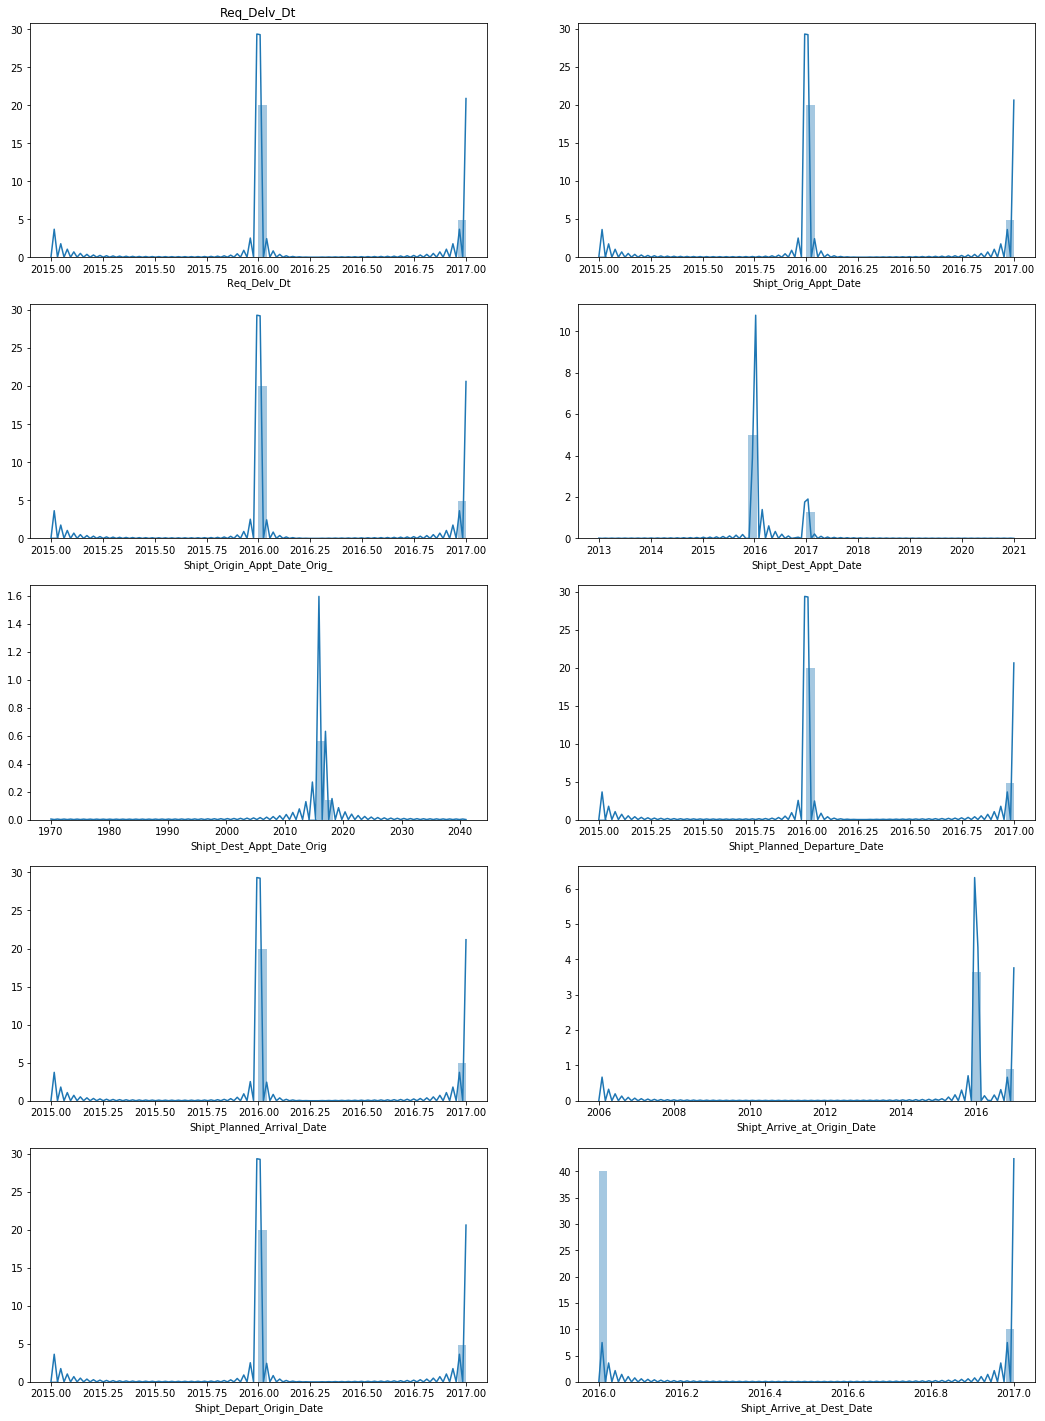

In [23]:
year1 = data['Req_Delv_Dt'].dt.year
year2 = data['Shipt_Orig_Appt_Date'].dt.year
year3 = data['Shipt_Origin_Appt_Date_Orig_'].dt.year
year4 = data['Shipt_Dest_Appt_Date'].dt.year
year5 = data['Shipt_Dest_Appt_Date_Orig'].dt.year
year6 = data['Shipt_Planned_Departure_Date'].dt.year
year7 = data['Shipt_Planned_Arrival_Date'].dt.year
year8 = data['Shipt_Arrive_at_Origin_Date'].dt.year
year9 = data['Shipt_Depart_Origin_Date'].dt.year
year10 = data['Shipt_Arrive_at_Dest_Date'].dt.year

# remove na's
year1 = year1.dropna()
year2 = year2.dropna()
year3 = year3.dropna()
year4 = year4.dropna()
year5 = year5.dropna()
year6 = year6.dropna()
year7 = year7.dropna()
year8 = year8.dropna()
year9 = year9.dropna()
year10 = year10.dropna()

# plot the day of the month
f,ax = plt.subplots(5,2, figsize=(18,25))

sns.distplot(year1,ax=ax[0, 0])
ax[0,0].set_title('Req_Delv_Dt')

sns.distplot(year2,ax=ax[0, 1])
#ax[0,1].set_title('Shipt_Orig_Appt_Date')

sns.distplot(year3,ax=ax[1, 0])
#ax[1,0].set_title('Shipt_Origin_Appt_Date_Orig_')

sns.distplot(year4,ax=ax[1, 1])
#ax[1,1].set_title('Shipt_Dest_Appt_Date')

sns.distplot(year5,ax=ax[2, 0])
#ax[2,0].set_title('Req_Delv_Dt')

sns.distplot(year6,ax=ax[2, 1])
#ax[2,1].set_title('Req_Delv_Dt')

sns.distplot(year7,ax=ax[3, 0])
#ax[3,0].set_title('Req_Delv_Dt')

sns.distplot(year8,ax=ax[3, 1])
#ax[3,1].set_title('Req_Delv_Dt')

sns.distplot(year9,ax=ax[4, 0])
#ax[4,0].set_title('Req_Delv_Dt')

sns.distplot(year10,ax=ax[4, 1])
#ax[4,1].set_title('Req_Delv_Dt')

plt.show()

### All the dates should be in between 2015 and 2017. Lets look at those that aren't

### Change dates earlier than 2015

In [24]:
#Lets look at Shipt_Dest_Appt_Date
data.query("Shipt_Dest_Appt_Date <'2015-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
26910,2016-05-31,T002,NaT,NaN,NaT,NaN,NaN,2013-06-03,1:30 PM,2016-05-31,...,0,0.0,0,0.0,0,0.0,Yes,1,21.616667,Primary


In [25]:
# Lets take another look at Shipt_Dest_Appt_Date
data.Shipt_Dest_Appt_Date.sort_values(ascending=True).head()

# the Year 2013 should probably be changed to 2016

26910   2013-06-03
4602    2015-01-06
4601    2015-01-06
18724   2015-03-25
6553    2015-12-28
Name: Shipt_Dest_Appt_Date, dtype: datetime64[ns]

In [26]:
# change the year to the correct year
data.set_value(26910, 'Shipt_Dest_Appt_Date', pd.to_datetime('2016-06-03'))

C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,0,0.0,0,0.0,0,0.000000,Yes,1,3.950000,Primary
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,20.816667,Primary
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,0,0.0,0,0.0,0,0.000000,Yes,1,38.766667,Primary
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,1,1.0,0,0.0,0,0.000000,No,0,9.216667,Secondary
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,No,0,9.216667,Secondary
5,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,9.216667,Secondary
6,2017-03-22,D003,2017-03-21,3:05 PM,2017-03-21,3:05 PM,NA-Normal Appointment,2017-03-22,7:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,17.600000,Primary
7,2017-03-21,C001,2017-03-20,3:05 PM,2017-03-20,3:05 PM,NA-Normal Appointment,2017-03-21,6:00 AM,2017-03-21,...,0,0.0,0,0.0,0,0.000000,Yes,1,0.000000,Primary
8,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,0,0.0,0,0.0,1,1.000000,No,0,45.000000,Secondary
9,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,0,0.0,0,0.0,1,1.000000,No,0,45.000000,Secondary


In [27]:
#Lets check to make sure it was changed
data.iloc[26910, 0:8] 

Req_Delv_Dt                     2016-05-31 00:00:00
Cust_Hier1                                     T002
Shipt_Orig_Appt_Date                            NaT
Shipt_Orig_Appt_Time                            NaN
Shipt_Origin_Appt_Date_Orig_                    NaT
Shipt_Origin_Appt_Time_Orig                     NaN
Shipment_Origin_Appt_Reason                     NaN
Shipt_Dest_Appt_Date            2016-06-03 00:00:00
Name: 26910, dtype: object

In [28]:
# Lets look at Shipt_Arrive_at_Origin_Date
data.query("Shipt_Arrive_at_Origin_Date <'2015-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
42187,2016-08-21,D003,2016-08-19,6:00 PM,2016-08-19,6:00 PM,NA-Normal Appointment,2016-08-23,10:00 PM,2016-08-21,...,0,0.0,0,0.0,0,0.0,Yes,1,5.383333,Primary


In [29]:
data.Shipt_Arrive_at_Origin_Date.sort_values(ascending=True).head()
# The year 2006 should probably be changed to 2016

42187   2006-08-20
5151    2015-12-17
9837    2015-12-19
9836    2015-12-19
9835    2015-12-19
Name: Shipt_Arrive_at_Origin_Date, dtype: datetime64[ns]

In [30]:
# change the year to the correct year
data.set_value(42187, 'Shipt_Arrive_at_Origin_Date', pd.to_datetime('2016-08-20'))

C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,0,0.0,0,0.0,0,0.000000,Yes,1,3.950000,Primary
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,20.816667,Primary
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,0,0.0,0,0.0,0,0.000000,Yes,1,38.766667,Primary
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,1,1.0,0,0.0,0,0.000000,No,0,9.216667,Secondary
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,No,0,9.216667,Secondary
5,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,9.216667,Secondary
6,2017-03-22,D003,2017-03-21,3:05 PM,2017-03-21,3:05 PM,NA-Normal Appointment,2017-03-22,7:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,17.600000,Primary
7,2017-03-21,C001,2017-03-20,3:05 PM,2017-03-20,3:05 PM,NA-Normal Appointment,2017-03-21,6:00 AM,2017-03-21,...,0,0.0,0,0.0,0,0.000000,Yes,1,0.000000,Primary
8,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,0,0.0,0,0.0,1,1.000000,No,0,45.000000,Secondary
9,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,0,0.0,0,0.0,1,1.000000,No,0,45.000000,Secondary


In [31]:
# Lets look at Shipt_Dest_Appt_Date_Orig
data.query("Shipt_Dest_Appt_Date_Orig <'2015-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
216,2017-03-21,C001,2017-03-20,2:15 PM,2017-03-20,2:15 PM,NA-Normal Appointment,2017-03-21,6:00 AM,1970-03-23,...,0,0.0,0,0.0,0,0.0,Yes,1,40.841667,Secondary
217,2017-03-21,C001,2017-03-20,2:15 PM,2017-03-20,2:15 PM,NA-Normal Appointment,2017-03-21,6:00 AM,1970-03-23,...,1,1.0,0,0.0,0,0.0,No,0,40.841667,Primary


In [32]:
data.Shipt_Dest_Appt_Date_Orig.sort_values(ascending=True).head()
# This should be changed to 2017

217    1970-03-23
216    1970-03-23
4547   2015-01-04
4250   2015-01-04
4546   2015-01-04
Name: Shipt_Dest_Appt_Date_Orig, dtype: datetime64[ns]

In [33]:
data.set_value(217, 'Shipt_Dest_Appt_Date_Orig', pd.to_datetime('2017-03-23'))
data.set_value(216, 'Shipt_Dest_Appt_Date_Orig', pd.to_datetime('2017-03-23'))


C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,0,0.0,0,0.0,0,0.000000,Yes,1,3.950000,Primary
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,20.816667,Primary
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,0,0.0,0,0.0,0,0.000000,Yes,1,38.766667,Primary
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,1,1.0,0,0.0,0,0.000000,No,0,9.216667,Secondary
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,No,0,9.216667,Secondary
5,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,9.216667,Secondary
6,2017-03-22,D003,2017-03-21,3:05 PM,2017-03-21,3:05 PM,NA-Normal Appointment,2017-03-22,7:00 AM,2017-03-22,...,0,0.0,0,0.0,0,0.000000,Yes,1,17.600000,Primary
7,2017-03-21,C001,2017-03-20,3:05 PM,2017-03-20,3:05 PM,NA-Normal Appointment,2017-03-21,6:00 AM,2017-03-21,...,0,0.0,0,0.0,0,0.000000,Yes,1,0.000000,Primary
8,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,0,0.0,0,0.0,1,1.000000,No,0,45.000000,Secondary
9,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,0,0.0,0,0.0,1,1.000000,No,0,45.000000,Secondary


### Change dates above 2017

In [34]:
# Lets look at Shipt_Dest_Appt_Date_Orig
data.query("Shipt_Dest_Appt_Date_Orig >'2018-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
19096,2016-03-16,D003,2016-03-21,4:00 PM,2016-03-21,4:30 PM,AD-Customer Requested Future Delivery,2016-03-22,5:00 AM,2022-03-16,...,1,1.0,0,0.0,0,0.0,No,0,29.541667,Primary
19097,2016-03-16,D003,2016-03-21,4:00 PM,2016-03-21,4:30 PM,AD-Customer Requested Future Delivery,2016-03-22,5:00 AM,2022-03-16,...,0,0.0,0,0.0,0,0.0,Yes,1,29.541667,Primary
30421,2016-06-28,D003,2016-06-27,6:00 PM,2016-06-25,8:00 PM,AV-Exceeds Service Limitations,2016-06-29,6:00 PM,2019-06-29,...,0,0.0,0,0.0,0,0.0,Yes,1,34.183333,Secondary
30422,2016-06-28,D003,2016-06-27,6:00 PM,2016-06-25,8:00 PM,AV-Exceeds Service Limitations,2016-06-29,6:00 PM,2019-06-29,...,0,0.0,0,0.0,1,1.0,No,0,34.183333,Primary
58764,2016-12-13,D003,2016-12-12,6:00 PM,2016-12-12,6:00 PM,NS-Normal Status,2018-12-13,6:00 PM,2018-12-13,...,0,0.0,0,0.0,0,0.0,Yes,1,19.700000,Primary
71566,2017-02-24,C001,2017-02-22,11:59 PM,2017-02-22,11:59 PM,NS-Normal Status,2017-02-24,6:00 AM,2041-02-22,...,0,0.0,0,0.0,0,0.0,Yes,1,9.066667,Secondary
72879,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2021-02-22,...,0,0.0,0,0.0,1,1.0,No,0,1767.708333,Secondary
72880,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2021-02-22,...,0,0.0,0,0.0,0,0.0,Yes,1,1767.708333,Secondary


In [35]:
data.iloc[19096, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-03-16')
data.iloc[19097, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-03-16')
data.iloc[30421, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-06-29')
data.iloc[30422, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-06-29')
data.iloc[58764, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-12-13')
data.iloc[71566, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2017-02-22')
data.iloc[72879, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2017-02-22')
data.iloc[72880, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2017-02-22')


In [36]:
#Lets check
data.iloc[19096, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] 


Timestamp('2016-03-16 00:00:00')

In [37]:
# Lets look at Shipt_Dest_Appt_Date_Orig
data.query("Shipt_Dest_Appt_Date_Orig >'2018-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type


In [38]:
# Lets look at Shipt_Dest_Appt_Date
data.query("Shipt_Dest_Appt_Date >'2018-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
30122,2016-06-22,D003,2016-06-21,8:00 AM,2016-06-21,4:00 PM,NS-Normal Status,2018-06-22,6:00 PM,2016-06-22,...,0,0.0,0,0.0,0,0.0,Yes,1,22.350000,Primary
42162,2016-08-19,D003,2016-08-18,1:00 PM,2016-08-18,4:00 PM,NS-Normal Status,2019-08-19,9:00 AM,2016-08-19,...,0,0.0,0,0.0,0,0.0,Yes,1,31.716667,Primary
58764,2016-12-13,D003,2016-12-12,6:00 PM,2016-12-12,6:00 PM,NS-Normal Status,2018-12-13,6:00 PM,2016-12-13,...,0,0.0,0,0.0,0,0.0,Yes,1,19.700000,Primary
72879,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2017-02-22,...,0,0.0,0,0.0,1,1.0,No,0,1767.708333,Secondary
72880,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2017-02-22,...,0,0.0,0,0.0,0,0.0,Yes,1,1767.708333,Secondary


In [39]:
# Lets change the year to the correct years

data.iloc[30122, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2016-06-22')
data.iloc[42162, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2016-08-19')
data.iloc[58764, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2016-12-13')
data.iloc[72879, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2017-02-22')
data.iloc[72880, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2017-02-22')

In [40]:
# Lets check Shipt_Dest_Appt_Date
data.query("Shipt_Dest_Appt_Date >'2018-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type


C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


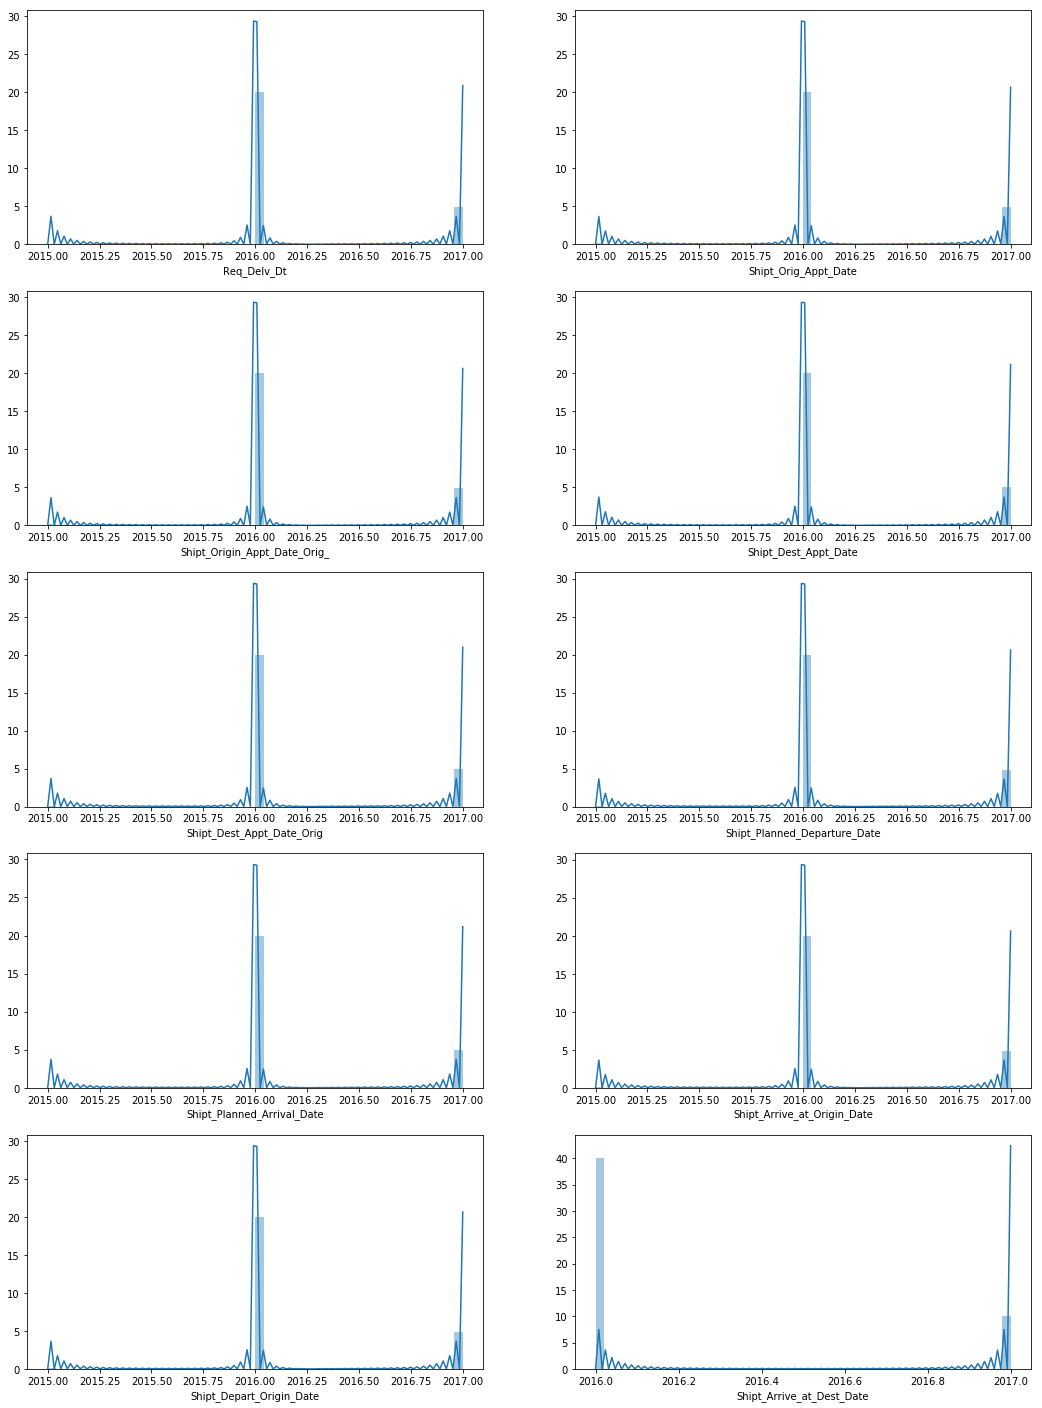

In [41]:
#check all the dates again
year1 = data['Req_Delv_Dt'].dt.year
year2 = data['Shipt_Orig_Appt_Date'].dt.year
year3 = data['Shipt_Origin_Appt_Date_Orig_'].dt.year
year4 = data['Shipt_Dest_Appt_Date'].dt.year
year5 = data['Shipt_Dest_Appt_Date_Orig'].dt.year
year6 = data['Shipt_Planned_Departure_Date'].dt.year
year7 = data['Shipt_Planned_Arrival_Date'].dt.year
year8 = data['Shipt_Arrive_at_Origin_Date'].dt.year
year9 = data['Shipt_Depart_Origin_Date'].dt.year
year10 = data['Shipt_Arrive_at_Dest_Date'].dt.year

# remove na's
year1 = year1.dropna()
year2 = year2.dropna()
year3 = year3.dropna()
year4 = year4.dropna()
year5 = year5.dropna()
year6 = year6.dropna()
year7 = year7.dropna()
year8 = year8.dropna()
year9 = year9.dropna()
year10 = year10.dropna()

# plot the day of the month
f,ax = plt.subplots(5,2, figsize=(18,25))

sns.distplot(year1,ax=ax[0, 0])

sns.distplot(year2,ax=ax[0, 1])

sns.distplot(year3,ax=ax[1, 0])

sns.distplot(year4,ax=ax[1, 1])

sns.distplot(year5,ax=ax[2, 0])

sns.distplot(year6,ax=ax[2, 1])

sns.distplot(year7,ax=ax[3, 0])

sns.distplot(year8,ax=ax[3, 1])

sns.distplot(year9,ax=ax[4, 0])

sns.distplot(year10,ax=ax[4, 1])

plt.show()

In [42]:
def plot_new_feature_distribution(df1,features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(5,2,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(5,2,i)
        sns.kdeplot(df1[feature],bw=0.5)
        plt.xlabel(feature, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

In [43]:
dates= pd.concat([year1, year2,year3,year4,year5,year6,year7,year8,year8,year10],axis=1)


In [44]:
clean_dates=dates.dropna()

C:\Users\mailm_000\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\mailm_000\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


<Figure size 432x288 with 0 Axes>

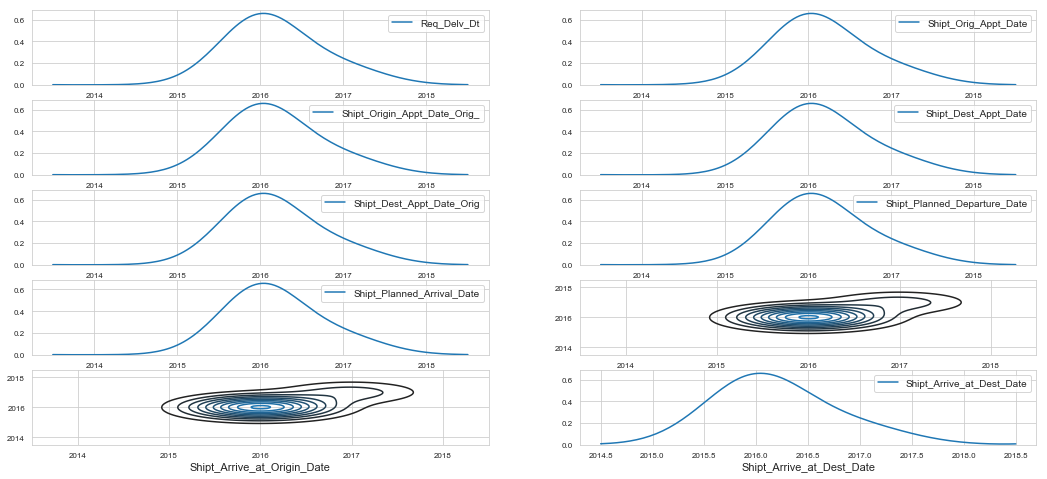

In [45]:
features = clean_dates.columns.values[0:]

plot_new_feature_distribution(clean_dates,features)

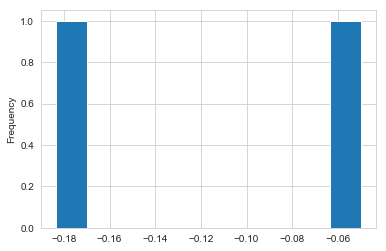

In [46]:
lowACR =data[data['Average_Carrier_Response_(Min)']<0]
lowACR['Average_Carrier_Response_(Min)'].plot(kind='hist')

In [47]:
lowACR

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type
18037,2016-03-10,C001,NaT,NaN,NaT,NaN,NaN,2016-03-09,7:00 AM,2016-03-09,...,0,0.0,0,0.0,0,0.0,Yes,1,-0.183333,Primary
19780,2016-03-15,D003,2016-03-11,12:35 PM,2016-03-11,12:35 PM,NA-Normal Appointment,2016-03-15,9:00 AM,2016-03-15,...,0,0.0,0,0.0,0,0.0,Yes,1,-0.050000,Secondary


In [48]:
# getthe absolute value of the average carrier response time
data['Average_Carrier_Response_(Min)']=data['Average_Carrier_Response_(Min)'].abs()
data['Average_Carrier_Response_(Min)']=pd.to_numeric(data['Average_Carrier_Response_(Min)'])

In [49]:
#check that there are only positive values
lowACR =data[data['Average_Carrier_Response_(Min)']<0]
lowACR

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type


## Convert the dates to day of the week

In [50]:

data['Req_Delv_Dt_Weekday'] = data.Req_Delv_Dt.dt.weekday_name

data['Shipt_Orig_Appt_Weekday']=data.Shipt_Orig_Appt_Date.dt.weekday_name


data['Shipt_Origin_Appt_Date_Orig_Weekday'] = data.Shipt_Origin_Appt_Date_Orig_.dt.weekday_name

data['Shipt_Dest_Appt_Date_Weekday'] = data.Shipt_Dest_Appt_Date.dt.weekday_name


data['Shipt_Dest_Appt_Date_Orig_Weekday'] = data.Shipt_Dest_Appt_Date_Orig.dt.weekday_name

data['Shipt_Planned_Departure_Date_Weekday'] = data.Shipt_Planned_Departure_Date.dt.weekday_name

data['Shipt_Planned_Arrival_Date_Weekday'] = data.Shipt_Planned_Arrival_Date.dt.weekday_name

data['Shipt_Arrive_at_Origin_Date_Weekday'] = data.Shipt_Arrive_at_Origin_Date.dt.weekday_name

data['Shipt_Depart_Origin_Date_Weekday'] = data.Shipt_Depart_Origin_Date.dt.weekday_name

data['Shipt_Arrive_at_Dest_Date_Weekday'] = data.Shipt_Arrive_at_Dest_Date.dt.weekday_name



In [51]:
# review the data to make sure the conversion is correct
data.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,Sunday,Friday,Friday,Sunday,Sunday,Friday,Sunday,Friday,Friday,Friday
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday


## Convert the time to a usable format

In [52]:
#this is an error in the data found from earlier cleaning efforts
data.query("Shipt_Depart_Origin_Time=='15:00.0'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
1046,2017-03-29,T002,NaT,NaN,NaT,NaN,NaN,2017-03-29,4:00 PM,2017-03-29,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
1047,2017-03-29,T002,NaT,NaN,NaT,NaN,NaN,2017-03-29,4:00 PM,2017-03-29,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
1048,2017-03-29,T002,NaT,NaN,NaT,NaN,NaN,2017-03-29,4:00 PM,2017-03-29,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday


In [53]:
#correcting the data
data.iloc[1046, data.columns.get_loc('Shipt_Depart_Origin_Time')]= '3:00 PM'
data.iloc[1047, data.columns.get_loc('Shipt_Depart_Origin_Time')]= '3:00 PM'
data.iloc[1048, data.columns.get_loc('Shipt_Depart_Origin_Time')]= '3:00 PM'


In [54]:
#making sure the change went through
data.query("Shipt_Depart_Origin_Time=='15:00.0'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday


In [55]:
# converting the times to military time
data['Shipt_Orig_Appt_Time'] = pd.to_datetime(data['Shipt_Origin_Appt_Time_Orig'],format ='%I:%M %p').dt.time 

data['Shipt_Origin_Appt_Time_Orig'] = pd.to_datetime(data['Shipt_Origin_Appt_Time_Orig'],format ='%I:%M %p').dt.time 

data['Shipt_Dest_Appt_Time'] = pd.to_datetime(data['Shipt_Dest_Appt_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Dest_Appt_Time_Orig'] = pd.to_datetime(data['Shipt_Dest_Appt_Time_Orig'],format ='%I:%M %p').dt.time 

data['Shipt_Planned_Departure_Time'] = pd.to_datetime(data['Shipt_Planned_Departure_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Planned_Arrival_Time'] = pd.to_datetime(data['Shipt_Planned_Arrival_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Arrive_at_Origin_Time'] = pd.to_datetime(data['Shipt_Arrive_at_Origin_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Depart_Origin_Time'] = pd.to_datetime(data['Shipt_Depart_Origin_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Arrive_at_Dest_Time'] = pd.to_datetime(data['Shipt_Arrive_at_Dest_Time'],format ='%I:%M %p').dt.time 



In [56]:
# converting the times to military time
data['Shipt_Orig_Appt_Time'] = pd.to_datetime(data['Shipt_Orig_Appt_Time'],format ='%H:%M:%S')

data['Shipt_Origin_Appt_Time_Orig'] = pd.to_datetime(data['Shipt_Origin_Appt_Time_Orig'],format ='%H:%M:%S')

data['Shipt_Dest_Appt_Time'] = pd.to_datetime(data['Shipt_Dest_Appt_Time'],format ='%H:%M:%S')

data['Shipt_Dest_Appt_Time_Orig'] = pd.to_datetime(data['Shipt_Dest_Appt_Time_Orig'],format ='%H:%M:%S')

data['Shipt_Planned_Departure_Time'] = pd.to_datetime(data['Shipt_Planned_Departure_Time'],format ='%H:%M:%S') 

data['Shipt_Planned_Arrival_Time'] = pd.to_datetime(data['Shipt_Planned_Arrival_Time'],format ='%H:%M:%S')

data['Shipt_Arrive_at_Origin_Time'] = pd.to_datetime(data['Shipt_Arrive_at_Origin_Time'],format ='%H:%M:%S') 

data['Shipt_Depart_Origin_Time'] = pd.to_datetime(data['Shipt_Depart_Origin_Time'],format ='%H:%M:%S')

data['Shipt_Arrive_at_Dest_Time'] = pd.to_datetime(data['Shipt_Arrive_at_Dest_Time'],format ='%H:%M:%S')




In [57]:
data['Shipt_Orig_Appt_Time_POD'] = pd.to_numeric(data['Shipt_Orig_Appt_Time'].dt.hour)
data['Shipt_Origin_Appt_Time_Orig_POD'] = pd.to_numeric(data['Shipt_Origin_Appt_Time_Orig'].dt.hour)
data['Shipt_Dest_Appt_Time_POD'] = pd.to_numeric(data['Shipt_Dest_Appt_Time'].dt.hour)
data['Shipt_Dest_Appt_Time_Orig_POD'] = pd.to_numeric(data['Shipt_Dest_Appt_Time_Orig'].dt.hour)
data['Shipt_Planned_Departure_Time_POD'] = pd.to_numeric(data['Shipt_Planned_Departure_Time'].dt.hour)
data['Shipt_Planned_Arrival_Time_POD'] = pd.to_numeric(data['Shipt_Planned_Arrival_Time'].dt.hour)
data['Shipt_Arrive_at_Origin_Time_POD'] = pd.to_numeric(data['Shipt_Arrive_at_Origin_Time'].dt.hour)
data['Shipt_Depart_Origin_Time_POD'] = pd.to_numeric(data['Shipt_Depart_Origin_Time'].dt.hour)
data['Shipt_Arrive_at_Dest_Time_POD'] = pd.to_numeric(data['Shipt_Arrive_at_Dest_Time'].dt.hour)

In [58]:
data['Shipt_Orig_Appt_Time_POD']=data['Shipt_Orig_Appt_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if (x >=20 and x<=24) else None ))))    
data['Shipt_Origin_Appt_Time_Orig_POD']=data['Shipt_Origin_Appt_Time_Orig_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if x >=20 and x<=24 else None))))    
data['Shipt_Dest_Appt_Time_POD']=data['Shipt_Dest_Appt_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if x >=20 and x<=24 else None))))    
data['Shipt_Dest_Appt_Time_Orig_POD']=data['Shipt_Dest_Appt_Time_Orig_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if x >=20 and x<=24 else None))))    
data['Shipt_Planned_Departure_Time_POD']=data['Shipt_Planned_Departure_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if x >=20 and x<=24 else None))))    
data['Shipt_Planned_Arrival_Time_POD']=data['Shipt_Planned_Arrival_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if x >=20 and x<=24 else None))))    
data['Shipt_Arrive_at_Origin_Time_POD']=data['Shipt_Arrive_at_Origin_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if x >=20 and x<=24 else None))))    
data['Shipt_Depart_Origin_Time_POD']=data['Shipt_Depart_Origin_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if x >=20 and x<=24 else None))))    
data['Shipt_Arrive_at_Dest_Time_POD']=data['Shipt_Arrive_at_Dest_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x >= 17 and x<20) else ('Night' if x >=20 and x<=24 else None))))    


In [59]:
data.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Shipt_Arrive_at_Dest_Date_Weekday,Shipt_Orig_Appt_Time_POD,Shipt_Origin_Appt_Time_Orig_POD,Shipt_Dest_Appt_Time_POD,Shipt_Dest_Appt_Time_Orig_POD,Shipt_Planned_Departure_Time_POD,Shipt_Planned_Arrival_Time_POD,Shipt_Arrive_at_Origin_Time_POD,Shipt_Depart_Origin_Time_POD,Shipt_Arrive_at_Dest_Time_POD
0,2017-03-24,C001,2017-03-23,1900-01-01 10:00:00,2017-03-23,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 10:00:00,2017-03-24,...,Friday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Morning
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,1900-01-01 14:00:00,2017-03-22,...,Wednesday,None,None,Afternoon,Morning,Morning,Morning,Morning,Morning,Morning
2,2017-03-26,T002,2017-03-24,1900-01-01 11:00:00,2017-03-24,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-26,1900-01-01 23:30:00,2017-03-26,...,Friday,Morning,Morning,Night,Morning,Morning,Morning,Morning,Afternoon,Evening
3,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Wednesday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Afternoon
4,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Wednesday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Afternoon


In [60]:
data.dtypes

Req_Delv_Dt                             datetime64[ns]
Cust_Hier1                                      object
Shipt_Orig_Appt_Date                    datetime64[ns]
Shipt_Orig_Appt_Time                    datetime64[ns]
Shipt_Origin_Appt_Date_Orig_            datetime64[ns]
Shipt_Origin_Appt_Time_Orig             datetime64[ns]
Shipment_Origin_Appt_Reason                     object
Shipt_Dest_Appt_Date                    datetime64[ns]
Shipt_Dest_Appt_Time                    datetime64[ns]
Shipt_Dest_Appt_Date_Orig               datetime64[ns]
Shipt_Dest_Appt_Time_Orig               datetime64[ns]
Shipment_Destination_Appt_Reason                object
Shipt_Planned_Departure_Date            datetime64[ns]
Shipt_Planned_Departure_Time            datetime64[ns]
Shipt_Planned_Arrival_Date              datetime64[ns]
Shipt_Planned_Arrival_Time              datetime64[ns]
Shipt_Arrive_at_Origin_Date             datetime64[ns]
Shipt_Arrive_at_Origin_Time             datetime64[ns]
Shipment_A

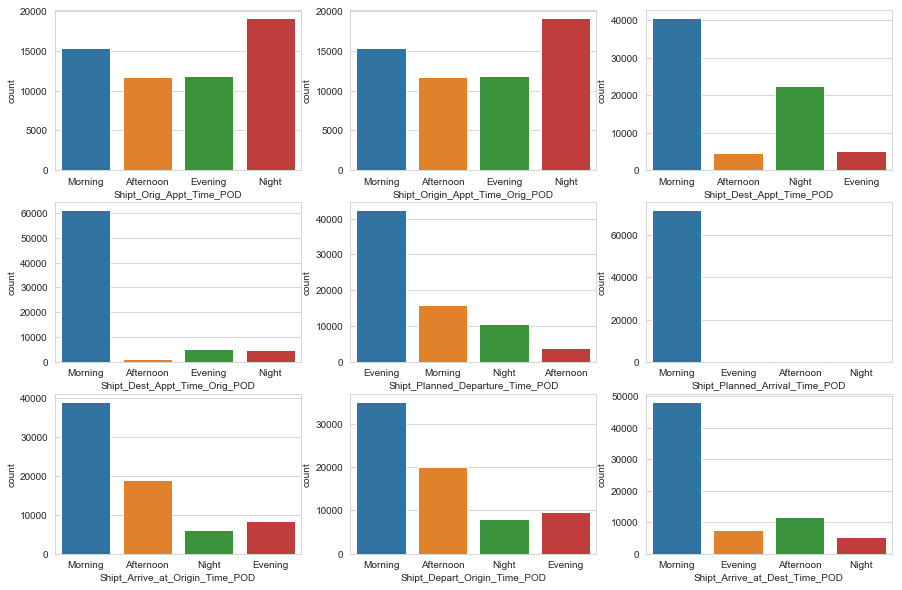

In [61]:
#plot the distribution of parts of day times
#seaborn automatically ignores null values when plotting

f, ax = plt.subplots(3,3,figsize=(15,10))

sns.countplot(data=data,x='Shipt_Orig_Appt_Time_POD',ax=ax[0,0])

sns.countplot(data=data,x='Shipt_Origin_Appt_Time_Orig_POD',ax=ax[0,1])

sns.countplot(data=data,x='Shipt_Dest_Appt_Time_POD',ax=ax[0,2])

sns.countplot(data=data,x='Shipt_Dest_Appt_Time_Orig_POD',ax=ax[1,0])

sns.countplot(data=data,x='Shipt_Planned_Departure_Time_POD',ax=ax[1,1])

sns.countplot(data=data,x='Shipt_Planned_Arrival_Time_POD',ax=ax[1,2])

sns.countplot(data=data,x='Shipt_Arrive_at_Origin_Time_POD',ax=ax[2,0])

sns.countplot(data=data,x='Shipt_Depart_Origin_Time_POD',ax=ax[2,1])

sns.countplot(data=data,x='Shipt_Arrive_at_Dest_Time_POD',ax=ax[2,2])


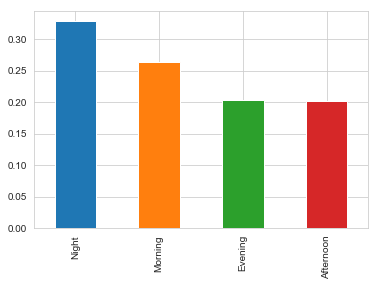

In [62]:
#plotting again but show total percentage
data['Shipt_Orig_Appt_Time_POD'].value_counts(normalize=True).plot(kind='bar')

In [63]:
data.isnull().sum()/len(data) *100

Req_Delv_Dt                              0.019203
Cust_Hier1                               0.000000
Shipt_Orig_Appt_Date                    20.173646
Shipt_Orig_Appt_Time                    20.173646
Shipt_Origin_Appt_Date_Orig_            20.173646
Shipt_Origin_Appt_Time_Orig             20.173646
Shipment_Origin_Appt_Reason             20.242226
Shipt_Dest_Appt_Date                     0.146762
Shipt_Dest_Appt_Time                     0.146762
Shipt_Dest_Appt_Date_Orig                0.470462
Shipt_Dest_Appt_Time_Orig                0.470462
Shipment_Destination_Appt_Reason         1.268740
Shipt_Planned_Departure_Date             0.000000
Shipt_Planned_Departure_Time             0.000000
Shipt_Planned_Arrival_Date               0.000000
Shipt_Planned_Arrival_Time               0.000000
Shipt_Arrive_at_Origin_Date              0.238660
Shipt_Arrive_at_Origin_Time              0.238660
Shipment_Arrive_Origin_Reason            0.432057
Shipt_Depart_Origin_Date                 0.004115


In [81]:
#increase the number of rows that are displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)

In [65]:
#creating a lookup table that maps POD to carrier
data_group1=data[['Carrier_Name','Shipt_Orig_Appt_Time_POD']]

#data_group1['Shipt_Orig_Appt_Time_POD']=data_group1['Shipt_Orig_Appt_Time_POD'].fillna(value='Missing')
#data_group1.groupby(['Carrier_Name','Shipt_Orig_Appt_Time_POD'])['Shipt_Orig_Appt_Time_POD'].agg({'no':'count'})
data_group1=data_group1.groupby(['Carrier_Name','Shipt_Orig_Appt_Time_POD']).size().reset_index(name='count')
Shipt_Orig_Appt_Time_POD_Lookup=data_group1.sort_values('count',ascending=False).drop_duplicates(['Carrier_Name'])
Shipt_Orig_Appt_Time_POD_Lookup=Shipt_Orig_Appt_Time_POD_Lookup.drop(columns=['count'])
Shipt_Orig_Appt_Time_POD_Lookup.set_index('Carrier_Name',inplace=True)
Shipt_Orig_Appt_Time_POD_Lookup.head()


#g=data_group1.query("Shipt_Orig_Appt_Time_POD=='Missing'").sort_values('count',ascending=False)

#g.head
#plt.figure(figsize=(25,35))
#sns.barplot(data=g,x='Carrier_Name',y='count',hue='Shipt_Orig_Appt_Time_POD')


,Shipt_Orig_Appt_Time_POD
Carrier_Name,
C135I,Night
C120H,Night
C227S,Night
C078C,Night
C247S,Morning


In [66]:
data_nonull=data

data_nonull['Shipt_Orig_Appt_Time_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Orig_Appt_Time_POD'].isnull(),'Shipt_Orig_Appt_Time_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)
data_nonull.head()


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Shipt_Arrive_at_Dest_Date_Weekday,Shipt_Orig_Appt_Time_POD,Shipt_Origin_Appt_Time_Orig_POD,Shipt_Dest_Appt_Time_POD,Shipt_Dest_Appt_Time_Orig_POD,Shipt_Planned_Departure_Time_POD,Shipt_Planned_Arrival_Time_POD,Shipt_Arrive_at_Origin_Time_POD,Shipt_Depart_Origin_Time_POD,Shipt_Arrive_at_Dest_Time_POD
0,2017-03-24,C001,2017-03-23,1900-01-01 10:00:00,2017-03-23,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 10:00:00,2017-03-24,...,Friday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Morning
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,1900-01-01 14:00:00,2017-03-22,...,Wednesday,Morning,None,Afternoon,Morning,Morning,Morning,Morning,Morning,Morning
2,2017-03-26,T002,2017-03-24,1900-01-01 11:00:00,2017-03-24,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-26,1900-01-01 23:30:00,2017-03-26,...,Friday,Morning,Morning,Night,Morning,Morning,Morning,Morning,Afternoon,Evening
3,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Wednesday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Afternoon
4,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Wednesday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Afternoon


In [67]:
#imputing missind data for Parts of Day based upon who the carrier is
#technically I should have a lookup table for each parts of the day, but most of the POD records have such a small amount of missing data that I will 
#just use one lookup table.
data_nonull['Shipt_Origin_Appt_Time_Orig_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Origin_Appt_Time_Orig_POD'].isnull(),'Shipt_Origin_Appt_Time_Orig_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)

data_nonull['Shipt_Dest_Appt_Time_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Dest_Appt_Time_POD'].isnull(),'Shipt_Dest_Appt_Time_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)

data_nonull['Shipt_Dest_Appt_Time_Orig_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Dest_Appt_Time_Orig_POD'].isnull(),'Shipt_Dest_Appt_Time_Orig_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)

data_nonull['Shipt_Planned_Departure_Time_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Planned_Departure_Time_POD'].isnull(),'Shipt_Planned_Departure_Time_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)

data_nonull['Shipt_Planned_Arrival_Time_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Planned_Arrival_Time_POD'].isnull(),'Shipt_Planned_Arrival_Time_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)

data_nonull['Shipt_Arrive_at_Origin_Time_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Arrive_at_Origin_Time_POD'].isnull(),'Shipt_Arrive_at_Origin_Time_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)

data_nonull['Shipt_Depart_Origin_Time_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Depart_Origin_Time_POD'].isnull(),'Shipt_Depart_Origin_Time_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)

data_nonull['Shipt_Arrive_at_Dest_Time_POD'].replace('Missing', np.NAN, inplace=True)
data_nonull.loc[data_nonull['Shipt_Arrive_at_Dest_Time_POD'].isnull(),'Shipt_Arrive_at_Dest_Time_POD'] = data_nonull['Carrier_Name'].map(Shipt_Orig_Appt_Time_POD_Lookup.Shipt_Orig_Appt_Time_POD)

data_nonull.head()



,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Shipt_Arrive_at_Dest_Date_Weekday,Shipt_Orig_Appt_Time_POD,Shipt_Origin_Appt_Time_Orig_POD,Shipt_Dest_Appt_Time_POD,Shipt_Dest_Appt_Time_Orig_POD,Shipt_Planned_Departure_Time_POD,Shipt_Planned_Arrival_Time_POD,Shipt_Arrive_at_Origin_Time_POD,Shipt_Depart_Origin_Time_POD,Shipt_Arrive_at_Dest_Time_POD
0,2017-03-24,C001,2017-03-23,1900-01-01 10:00:00,2017-03-23,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 10:00:00,2017-03-24,...,Friday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Morning
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,1900-01-01 14:00:00,2017-03-22,...,Wednesday,Morning,Morning,Afternoon,Morning,Morning,Morning,Morning,Morning,Morning
2,2017-03-26,T002,2017-03-24,1900-01-01 11:00:00,2017-03-24,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-26,1900-01-01 23:30:00,2017-03-26,...,Friday,Morning,Morning,Night,Morning,Morning,Morning,Morning,Afternoon,Evening
3,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Wednesday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Afternoon
4,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Wednesday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Afternoon


In [68]:
data_nonull.isnull().sum()

Req_Delv_Dt                                14
Cust_Hier1                                  0
Shipt_Orig_Appt_Date                    14708
Shipt_Orig_Appt_Time                    14708
Shipt_Origin_Appt_Date_Orig_            14708
Shipt_Origin_Appt_Time_Orig             14708
Shipment_Origin_Appt_Reason             14758
Shipt_Dest_Appt_Date                      107
Shipt_Dest_Appt_Time                      107
Shipt_Dest_Appt_Date_Orig                 343
Shipt_Dest_Appt_Time_Orig                 343
Shipment_Destination_Appt_Reason          925
Shipt_Planned_Departure_Date                0
Shipt_Planned_Departure_Time                0
Shipt_Planned_Arrival_Date                  0
Shipt_Planned_Arrival_Time                  0
Shipt_Arrive_at_Origin_Date               174
Shipt_Arrive_at_Origin_Time               174
Shipment_Arrive_Origin_Reason             315
Shipt_Depart_Origin_Date                    3
Shipt_Depart_Origin_Time                    3
Shipt_Arrive_at_Dest_Date         

In [69]:
a=data_nonull[data_nonull['Shipt_Orig_Appt_Time_POD'].isnull()]
a[['Shipt_Orig_Appt_Time_POD','Carrier_Name']]

,Shipt_Orig_Appt_Time_POD,Carrier_Name
1075,NaN,NaN
1076,NaN,NaN
1079,NaN,NaN
1652,NaN,NaN
2926,NaN,NaN
2927,NaN,NaN
3550,NaN,NaN
3552,NaN,NaN


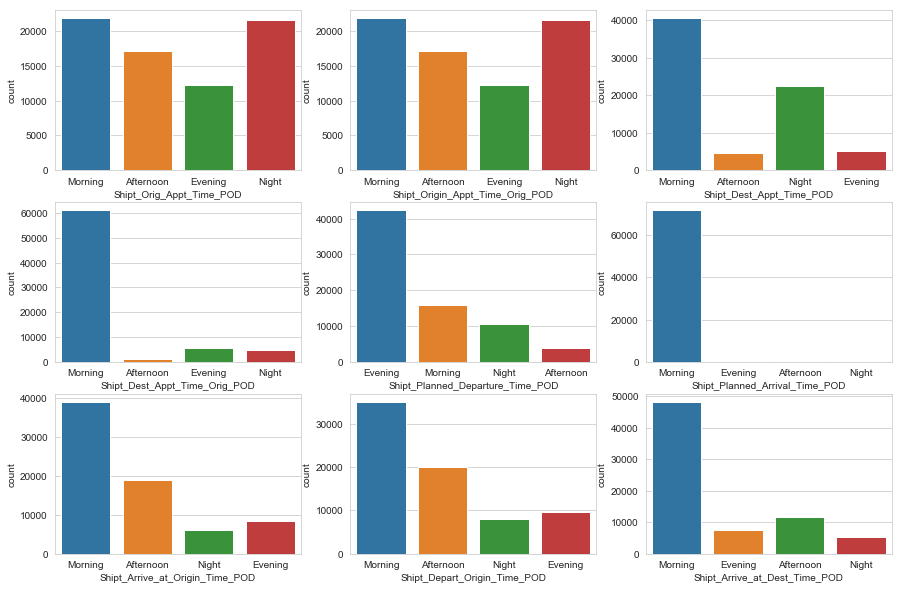

In [70]:
#plot the distribution of parts of day times
#seaborn automatically ignores null values when plotting

f, ax = plt.subplots(3,3,figsize=(15,10))

sns.countplot(data=data_nonull,x='Shipt_Orig_Appt_Time_POD',ax=ax[0,0])

sns.countplot(data=data_nonull,x='Shipt_Origin_Appt_Time_Orig_POD',ax=ax[0,1])

sns.countplot(data=data_nonull,x='Shipt_Dest_Appt_Time_POD',ax=ax[0,2])

sns.countplot(data=data_nonull,x='Shipt_Dest_Appt_Time_Orig_POD',ax=ax[1,0])

sns.countplot(data=data_nonull,x='Shipt_Planned_Departure_Time_POD',ax=ax[1,1])

sns.countplot(data=data_nonull,x='Shipt_Planned_Arrival_Time_POD',ax=ax[1,2])

sns.countplot(data=data_nonull,x='Shipt_Arrive_at_Origin_Time_POD',ax=ax[2,0])

sns.countplot(data=data_nonull,x='Shipt_Depart_Origin_Time_POD',ax=ax[2,1])

sns.countplot(data=data_nonull,x='Shipt_Arrive_at_Dest_Time_POD',ax=ax[2,2])


In [71]:
#I'm not going to impute day of the week because of the high probablity of putting in bad data
#I'm going to simlpy fill in missing data with "missing"

#imputing missind data for Parts of Day based upon who the carrier is
#technically I should have a lookup table for each parts of the day, but most of the POD records have such a small amount of missing data that I will 
#just use one lookup table.

data_nonull['Req_Delv_Dt_Weekday'].fillna("Missing",inplace= True)

data_nonull['Shipt_Orig_Appt_Weekday'].fillna("Missing",inplace= True)

data_nonull['Shipt_Origin_Appt_Date_Orig_Weekday'].fillna("Missing",inplace= True)

data_nonull['Shipt_Dest_Appt_Date_Weekday'].fillna("Missing",inplace= True)

data_nonull['Shipt_Dest_Appt_Date_Orig_Weekday'].fillna("Missing",inplace= True)

data_nonull['Shipt_Arrive_at_Origin_Date_Weekday'].fillna("Missing",inplace= True)

data_nonull['Shipt_Depart_Origin_Date_Weekday'].fillna("Missing",inplace= True)

data_nonull['Shipt_Arrive_at_Dest_Date_Weekday'].fillna("Missing",inplace= True)



In [72]:
data_nonull.isnull().sum()

Req_Delv_Dt                                14
Cust_Hier1                                  0
Shipt_Orig_Appt_Date                    14708
Shipt_Orig_Appt_Time                    14708
Shipt_Origin_Appt_Date_Orig_            14708
Shipt_Origin_Appt_Time_Orig             14708
Shipment_Origin_Appt_Reason             14758
Shipt_Dest_Appt_Date                      107
Shipt_Dest_Appt_Time                      107
Shipt_Dest_Appt_Date_Orig                 343
Shipt_Dest_Appt_Time_Orig                 343
Shipment_Destination_Appt_Reason          925
Shipt_Planned_Departure_Date                0
Shipt_Planned_Departure_Time                0
Shipt_Planned_Arrival_Date                  0
Shipt_Planned_Arrival_Time                  0
Shipt_Arrive_at_Origin_Date               174
Shipt_Arrive_at_Origin_Time               174
Shipment_Arrive_Origin_Reason             315
Shipt_Depart_Origin_Date                    3
Shipt_Depart_Origin_Time                    3
Shipt_Arrive_at_Dest_Date         

In [73]:
data_nonull.drop(data_nonull[data_nonull['Req_Delv_Dt'].isnull()].index, inplace=True)

In [74]:
data_nonull.drop(data_nonull[data_nonull['Shipt_Arrive_at_Dest_Date'].isnull()].index, inplace=True)

In [75]:
data_nonull['ORGIN_APPOINT_REA_CODE_FN'].fillna("Missing",inplace= True)
data_nonull['ARRIVE_DEST_REA_CODE_FN'].fillna("Missing",inplace= True)
data_nonull['DEST_APPOINT_REA_CODE_FN'].fillna("Missing",inplace= True)
data_nonull['ORG_ARRIVE_REA_CODE_FN'].fillna("Missing",inplace= True)
data_nonull['Carrier_Name'].fillna("Missing",inplace= True)
data_nonull['Shipt_Orig_Appt_Time_POD'].fillna("Missing",inplace= True)
data_nonull['Shipt_Origin_Appt_Time_Orig_POD'].fillna("Missing",inplace= True)
data_nonull['Shipment_Arrive_Origin_Reason'].fillna("Missing",inplace= True)
data_nonull['Shipment_Arrive_Destination_Reason'].fillna("Missing",inplace= True)
data_nonull['Shipment_Destination_Appt_Reason'].fillna("Missing",inplace= True)




In [76]:
data_nonull.isnull().sum()

Req_Delv_Dt                                 0
Cust_Hier1                                  0
Shipt_Orig_Appt_Date                    14706
Shipt_Orig_Appt_Time                    14706
Shipt_Origin_Appt_Date_Orig_            14706
Shipt_Origin_Appt_Time_Orig             14706
Shipment_Origin_Appt_Reason             14756
Shipt_Dest_Appt_Date                       93
Shipt_Dest_Appt_Time                       93
Shipt_Dest_Appt_Date_Orig                 329
Shipt_Dest_Appt_Time_Orig                 329
Shipment_Destination_Appt_Reason            0
Shipt_Planned_Departure_Date                0
Shipt_Planned_Departure_Time                0
Shipt_Planned_Arrival_Date                  0
Shipt_Planned_Arrival_Time                  0
Shipt_Arrive_at_Origin_Date               174
Shipt_Arrive_at_Origin_Time               174
Shipment_Arrive_Origin_Reason               0
Shipt_Depart_Origin_Date                    3
Shipt_Depart_Origin_Time                    3
Shipt_Arrive_at_Dest_Date         

In [77]:
#create columns for late deliver 1=late, 0=on time and create a column for planned as requested
data_nonull['late_delivery']= np.where(data_nonull['Shipt_Arrive_at_Dest_Date'] > data_nonull['Req_Delv_Dt'],1,0)
data_nonull['Planned_as_requested']= np.where(data_nonull['Shipt_Planned_Arrival_Date'] == data_nonull['Req_Delv_Dt'],1,0)

data_nonull.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Shipt_Origin_Appt_Time_Orig_POD,Shipt_Dest_Appt_Time_POD,Shipt_Dest_Appt_Time_Orig_POD,Shipt_Planned_Departure_Time_POD,Shipt_Planned_Arrival_Time_POD,Shipt_Arrive_at_Origin_Time_POD,Shipt_Depart_Origin_Time_POD,Shipt_Arrive_at_Dest_Time_POD,late_delivery,Planned_as_requested
0,2017-03-24,C001,2017-03-23,1900-01-01 10:00:00,2017-03-23,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 10:00:00,2017-03-24,...,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Morning,0,1
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,1900-01-01 14:00:00,2017-03-22,...,Morning,Afternoon,Morning,Morning,Morning,Morning,Morning,Morning,0,1
2,2017-03-26,T002,2017-03-24,1900-01-01 11:00:00,2017-03-24,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-26,1900-01-01 23:30:00,2017-03-26,...,Morning,Night,Morning,Morning,Morning,Morning,Afternoon,Evening,0,1
3,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Afternoon,0,1
4,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Afternoon,0,1


In [120]:
data_nonull[['Req_Delv_Dt','Shipt_Arrive_at_Dest_Date','late_delivery','Shipt_Planned_Arrival_Date','Planned_as_requested']]

,Req_Delv_Dt,Shipt_Arrive_at_Dest_Date,late_delivery,Shipt_Planned_Arrival_Date,Planned_as_requested
0,2017-03-24,2017-03-24,0,2017-03-24,1
1,2017-03-22,2017-03-22,0,2017-03-22,1
2,2017-03-26,2017-03-24,0,2017-03-26,1
3,2017-03-22,2017-03-22,0,2017-03-22,1
4,2017-03-22,2017-03-22,0,2017-03-22,1
5,2017-03-22,2017-03-22,0,2017-03-22,1
6,2017-03-22,2017-03-21,0,2017-03-22,1
7,2017-03-21,2017-03-21,0,2017-03-21,1
8,2017-03-21,2017-03-21,0,2017-03-21,1
9,2017-03-21,2017-03-21,0,2017-03-21,1


In [82]:
clean_data=data_nonull[data_nonull['Planned_as_requested']==1]
clean_data.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,Shipt_Dest_Appt_Time_Orig,Shipment_Destination_Appt_Reason,Shipt_Planned_Departure_Date,Shipt_Planned_Departure_Time,Shipt_Planned_Arrival_Date,Shipt_Planned_Arrival_Time,Shipt_Arrive_at_Origin_Date,Shipt_Arrive_at_Origin_Time,Shipment_Arrive_Origin_Reason,Shipt_Depart_Origin_Date,Shipt_Depart_Origin_Time,Shipt_Arrive_at_Dest_Date,Shipt_Arrive_at_Dest_Time,Shipment_Arrive_Destination_Reason,Shipment_Weight_(lb),Shipment_Volume_(cubic_ft),Shipment_Loaded_Miles,Order_#,Stop_Number,TRANSPORT_MODE,ORG_ZIP_FN,DEST_ZP_FN,ORGIN_APPOINT_REA_CODE_FN,DEST_APPOINT_REA_CODE_FN,ORG_ARRIVE_REA_CODE_FN,ARRIVE_DEST_REA_CODE_FN,ACT_DEL_DATE_FN,ACT_DEL_TIME_FN,WK_ENDING,Origin_Loc_ID,Origin_City,Origin_State,Origin_Zip,Destination_Loc_ID,Destination_City,Destination_State,Destination_Zip,Carrier_Name,SID,Loads_/_Lane,Total_Tenders,Accepted,%_Accepted,Cancelled,%_Cancelled,Withdrawn,%_Withdrawn,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday,Shipt_Orig_Appt_Time_POD,Shipt_Origin_Appt_Time_Orig_POD,Shipt_Dest_Appt_Time_POD,Shipt_Dest_Appt_Time_Orig_POD,Shipt_Planned_Departure_Time_POD,Shipt_Planned_Arrival_Time_POD,Shipt_Arrive_at_Origin_Time_POD,Shipt_Depart_Origin_Time_POD,Shipt_Arrive_at_Dest_Time_POD,late_delivery,Planned_as_requested
0,2017-03-24,C001,2017-03-23,1900-01-01 10:00:00,2017-03-23,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 10:00:00,2017-03-24,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-23,1900-01-01 17:00:00,2017-03-24,1900-01-01 05:00:00,2017-03-23,1900-01-01 08:44:00,NS-Normal Status,2017-03-23,1900-01-01 09:48:00,2017-03-24,1900-01-01 09:31:00,NS-Normal Status,45580.6,2501.81,325,30327684,2,Truckload,91708,85353,Missing,Missing,NS,NS,3/24/2017,9:31 AM,3/24/2017,U021,CHINO,CA,91708,1.03E+12,TOLLESON,AZ,85353,C247S,446000174249999,4,1,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,Yes,1,3.950000,Primary,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Morning,0,1
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,1900-01-01 14:00:00,2017-03-22,1900-01-01 12:00:00,NS-Normal Status,2017-03-21,1900-01-01 12:00:00,2017-03-22,1900-01-01 12:00:00,2017-03-22,1900-01-01 08:35:00,NS-Normal Status,2017-03-22,1900-01-01 09:08:00,2017-03-22,1900-01-01 09:58:00,NS-Normal Status,24714.5,1153.10,24,30331189,2,Truckload,91708,92377,Missing,NS,NS,NS,3/22/2017,9:58 AM,3/24/2017,U021,CHINO,CA,91708,3806,RIALTO,CA,92377,C095E,446000174232076,1,1,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,Yes,1,20.816667,Primary,Wednesday,Missing,Missing,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday,Morning,Morning,Afternoon,Morning,Morning,Morning,Morning,Morning,Morning,0,1
2,2017-03-26,T002,2017-03-24,1900-01-01 11:00:00,2017-03-24,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-26,1900-01-01 23:30:00,2017-03-26,1900-01-01 12:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 07:00:00,2017-03-26,1900-01-01 12:00:00,2017-03-24,1900-01-01 12:11:00,NS-Normal Status,2017-03-24,1900-01-01 13:13:00,2017-03-24,1900-01-01 17:08:00,NS-Normal Status,24682.5,1150.65,160,30336337,2,Truckload,91708,93263,Missing,Missing,NS,NS,3/24/2017,5:08 PM,3/24/2017,U021,CHINO,CA,91708,593,SHAFTER,CA,93263,C135I,446000174346889,1,1,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,Yes,1,38.766667,Primary,Sunday,Friday,Friday,Sunday,Sunday,Friday,Sunday,Friday

In [83]:
clean_data.isnull().sum()/len(clean_data) *100

Req_Delv_Dt                              0.000000
Cust_Hier1                               0.000000
Shipt_Orig_Appt_Date                    21.098641
Shipt_Orig_Appt_Time                    21.098641
Shipt_Origin_Appt_Date_Orig_            21.098641
Shipt_Origin_Appt_Time_Orig             21.098641
Shipment_Origin_Appt_Reason             21.177679
Shipt_Dest_Appt_Date                     0.116978
Shipt_Dest_Appt_Time                     0.116978
Shipt_Dest_Appt_Date_Orig                0.466329
Shipt_Dest_Appt_Time_Orig                0.466329
Shipment_Destination_Appt_Reason         0.000000
Shipt_Planned_Departure_Date             0.000000
Shipt_Planned_Departure_Time             0.000000
Shipt_Planned_Arrival_Date               0.000000
Shipt_Planned_Arrival_Time               0.000000
Shipt_Arrive_at_Origin_Date              0.222890
Shipt_Arrive_at_Origin_Time              0.222890
Shipment_Arrive_Origin_Reason            0.000000
Shipt_Depart_Origin_Date                 0.004742


In [84]:
clean_data.dtypes

Req_Delv_Dt                             datetime64[ns]
Cust_Hier1                                      object
Shipt_Orig_Appt_Date                    datetime64[ns]
Shipt_Orig_Appt_Time                    datetime64[ns]
Shipt_Origin_Appt_Date_Orig_            datetime64[ns]
Shipt_Origin_Appt_Time_Orig             datetime64[ns]
Shipment_Origin_Appt_Reason                     object
Shipt_Dest_Appt_Date                    datetime64[ns]
Shipt_Dest_Appt_Time                    datetime64[ns]
Shipt_Dest_Appt_Date_Orig               datetime64[ns]
Shipt_Dest_Appt_Time_Orig               datetime64[ns]
Shipment_Destination_Appt_Reason                object
Shipt_Planned_Departure_Date            datetime64[ns]
Shipt_Planned_Departure_Time            datetime64[ns]
Shipt_Planned_Arrival_Date              datetime64[ns]
Shipt_Planned_Arrival_Time              datetime64[ns]
Shipt_Arrive_at_Origin_Date             datetime64[ns]
Shipt_Arrive_at_Origin_Time             datetime64[ns]
Shipment_A

In [88]:
#create unique identifer for the records since there isn't one (SID + Order #)
clean_data['SID_Order_#']=clean_data['SID'].map(str)+ "-"+clean_data['Order_#'].map(str)



C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
clean_data['count'] = clean_data.groupby('SID_Order_#')['SID_Order_#'].transform('count')


C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
clean_data.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,Shipt_Dest_Appt_Time_Orig,Shipment_Destination_Appt_Reason,Shipt_Planned_Departure_Date,Shipt_Planned_Departure_Time,Shipt_Planned_Arrival_Date,Shipt_Planned_Arrival_Time,Shipt_Arrive_at_Origin_Date,Shipt_Arrive_at_Origin_Time,Shipment_Arrive_Origin_Reason,Shipt_Depart_Origin_Date,Shipt_Depart_Origin_Time,Shipt_Arrive_at_Dest_Date,Shipt_Arrive_at_Dest_Time,Shipment_Arrive_Destination_Reason,Shipment_Weight_(lb),Shipment_Volume_(cubic_ft),Shipment_Loaded_Miles,Order_#,Stop_Number,TRANSPORT_MODE,ORG_ZIP_FN,DEST_ZP_FN,ORGIN_APPOINT_REA_CODE_FN,DEST_APPOINT_REA_CODE_FN,ORG_ARRIVE_REA_CODE_FN,ARRIVE_DEST_REA_CODE_FN,ACT_DEL_DATE_FN,ACT_DEL_TIME_FN,WK_ENDING,Origin_Loc_ID,Origin_City,Origin_State,Origin_Zip,Destination_Loc_ID,Destination_City,Destination_State,Destination_Zip,Carrier_Name,SID,Loads_/_Lane,Total_Tenders,Accepted,%_Accepted,Cancelled,%_Cancelled,Withdrawn,%_Withdrawn,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday,Shipt_Orig_Appt_Time_POD,Shipt_Origin_Appt_Time_Orig_POD,Shipt_Dest_Appt_Time_POD,Shipt_Dest_Appt_Time_Orig_POD,Shipt_Planned_Departure_Time_POD,Shipt_Planned_Arrival_Time_POD,Shipt_Arrive_at_Origin_Time_POD,Shipt_Depart_Origin_Time_POD,Shipt_Arrive_at_Dest_Time_POD,late_delivery,Planned_as_requested,SID_Order_#,count
0,2017-03-24,C001,2017-03-23,1900-01-01 10:00:00,2017-03-23,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 10:00:00,2017-03-24,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-23,1900-01-01 17:00:00,2017-03-24,1900-01-01 05:00:00,2017-03-23,1900-01-01 08:44:00,NS-Normal Status,2017-03-23,1900-01-01 09:48:00,2017-03-24,1900-01-01 09:31:00,NS-Normal Status,45580.6,2501.81,325,30327684,2,Truckload,91708,85353,Missing,Missing,NS,NS,3/24/2017,9:31 AM,3/24/2017,U021,CHINO,CA,91708,1.03E+12,TOLLESON,AZ,85353,C247S,446000174249999,4,1,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,Yes,1,3.950000,Primary,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday,Morning,Morning,Morning,Morning,Evening,Morning,Morning,Morning,Morning,0,1,446000174249999-30327684,1
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,1900-01-01 14:00:00,2017-03-22,1900-01-01 12:00:00,NS-Normal Status,2017-03-21,1900-01-01 12:00:00,2017-03-22,1900-01-01 12:00:00,2017-03-22,1900-01-01 08:35:00,NS-Normal Status,2017-03-22,1900-01-01 09:08:00,2017-03-22,1900-01-01 09:58:00,NS-Normal Status,24714.5,1153.10,24,30331189,2,Truckload,91708,92377,Missing,NS,NS,NS,3/22/2017,9:58 AM,3/24/2017,U021,CHINO,CA,91708,3806,RIALTO,CA,92377,C095E,446000174232076,1,1,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,Yes,1,20.816667,Primary,Wednesday,Missing,Missing,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday,Morning,Morning,Afternoon,Morning,Morning,Morning,Morning,Morning,Morning,0,1,446000174232076-30331189,1
2,2017-03-26,T002,2017-03-24,1900-01-01 11:00:00,2017-03-24,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-26,1900-01-01 23:30:00,2017-03-26,1900-01-01 12:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 07:00:00,2017-03-26,1900-01-01 12:00:00,2017-03-24,1900-01-01 12:11:00,NS-Normal Status,2017-03-24,1900-01-01 13:13:00,2017-03-24,1900-01-01 17:08:00,NS-Normal Status,24682.5,1150.65,160,30336337,2,Truckload,91708,93263,Missing,Missing,NS,NS,3/24/2017,5:08 PM,3/24/2017,U021,CHINO,CA,91708,593,SHAFTER,CA,93263,C135I,446000174346889,1,1,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,Yes,1,3

In [119]:
u_clean_data=clean_data.drop_duplicates(subset='SID_Order_#')
u_clean_data.shape

(45820, 90)

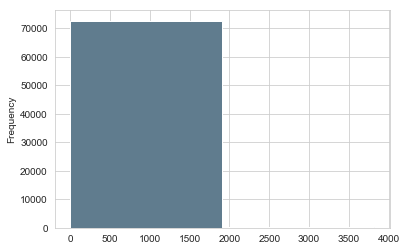

In [70]:
data['Average_Carrier_Response_(Min)'].plot.hist(grid=True, bins=2, rwidth=10,color='#607c8e')


In [71]:
max(data['Average_Carrier_Response_(Min)'])

3819.333333

In [72]:
min(data['Average_Carrier_Response_(Min)'])

0.0

Text(0.5,1,'Total_Tenders')

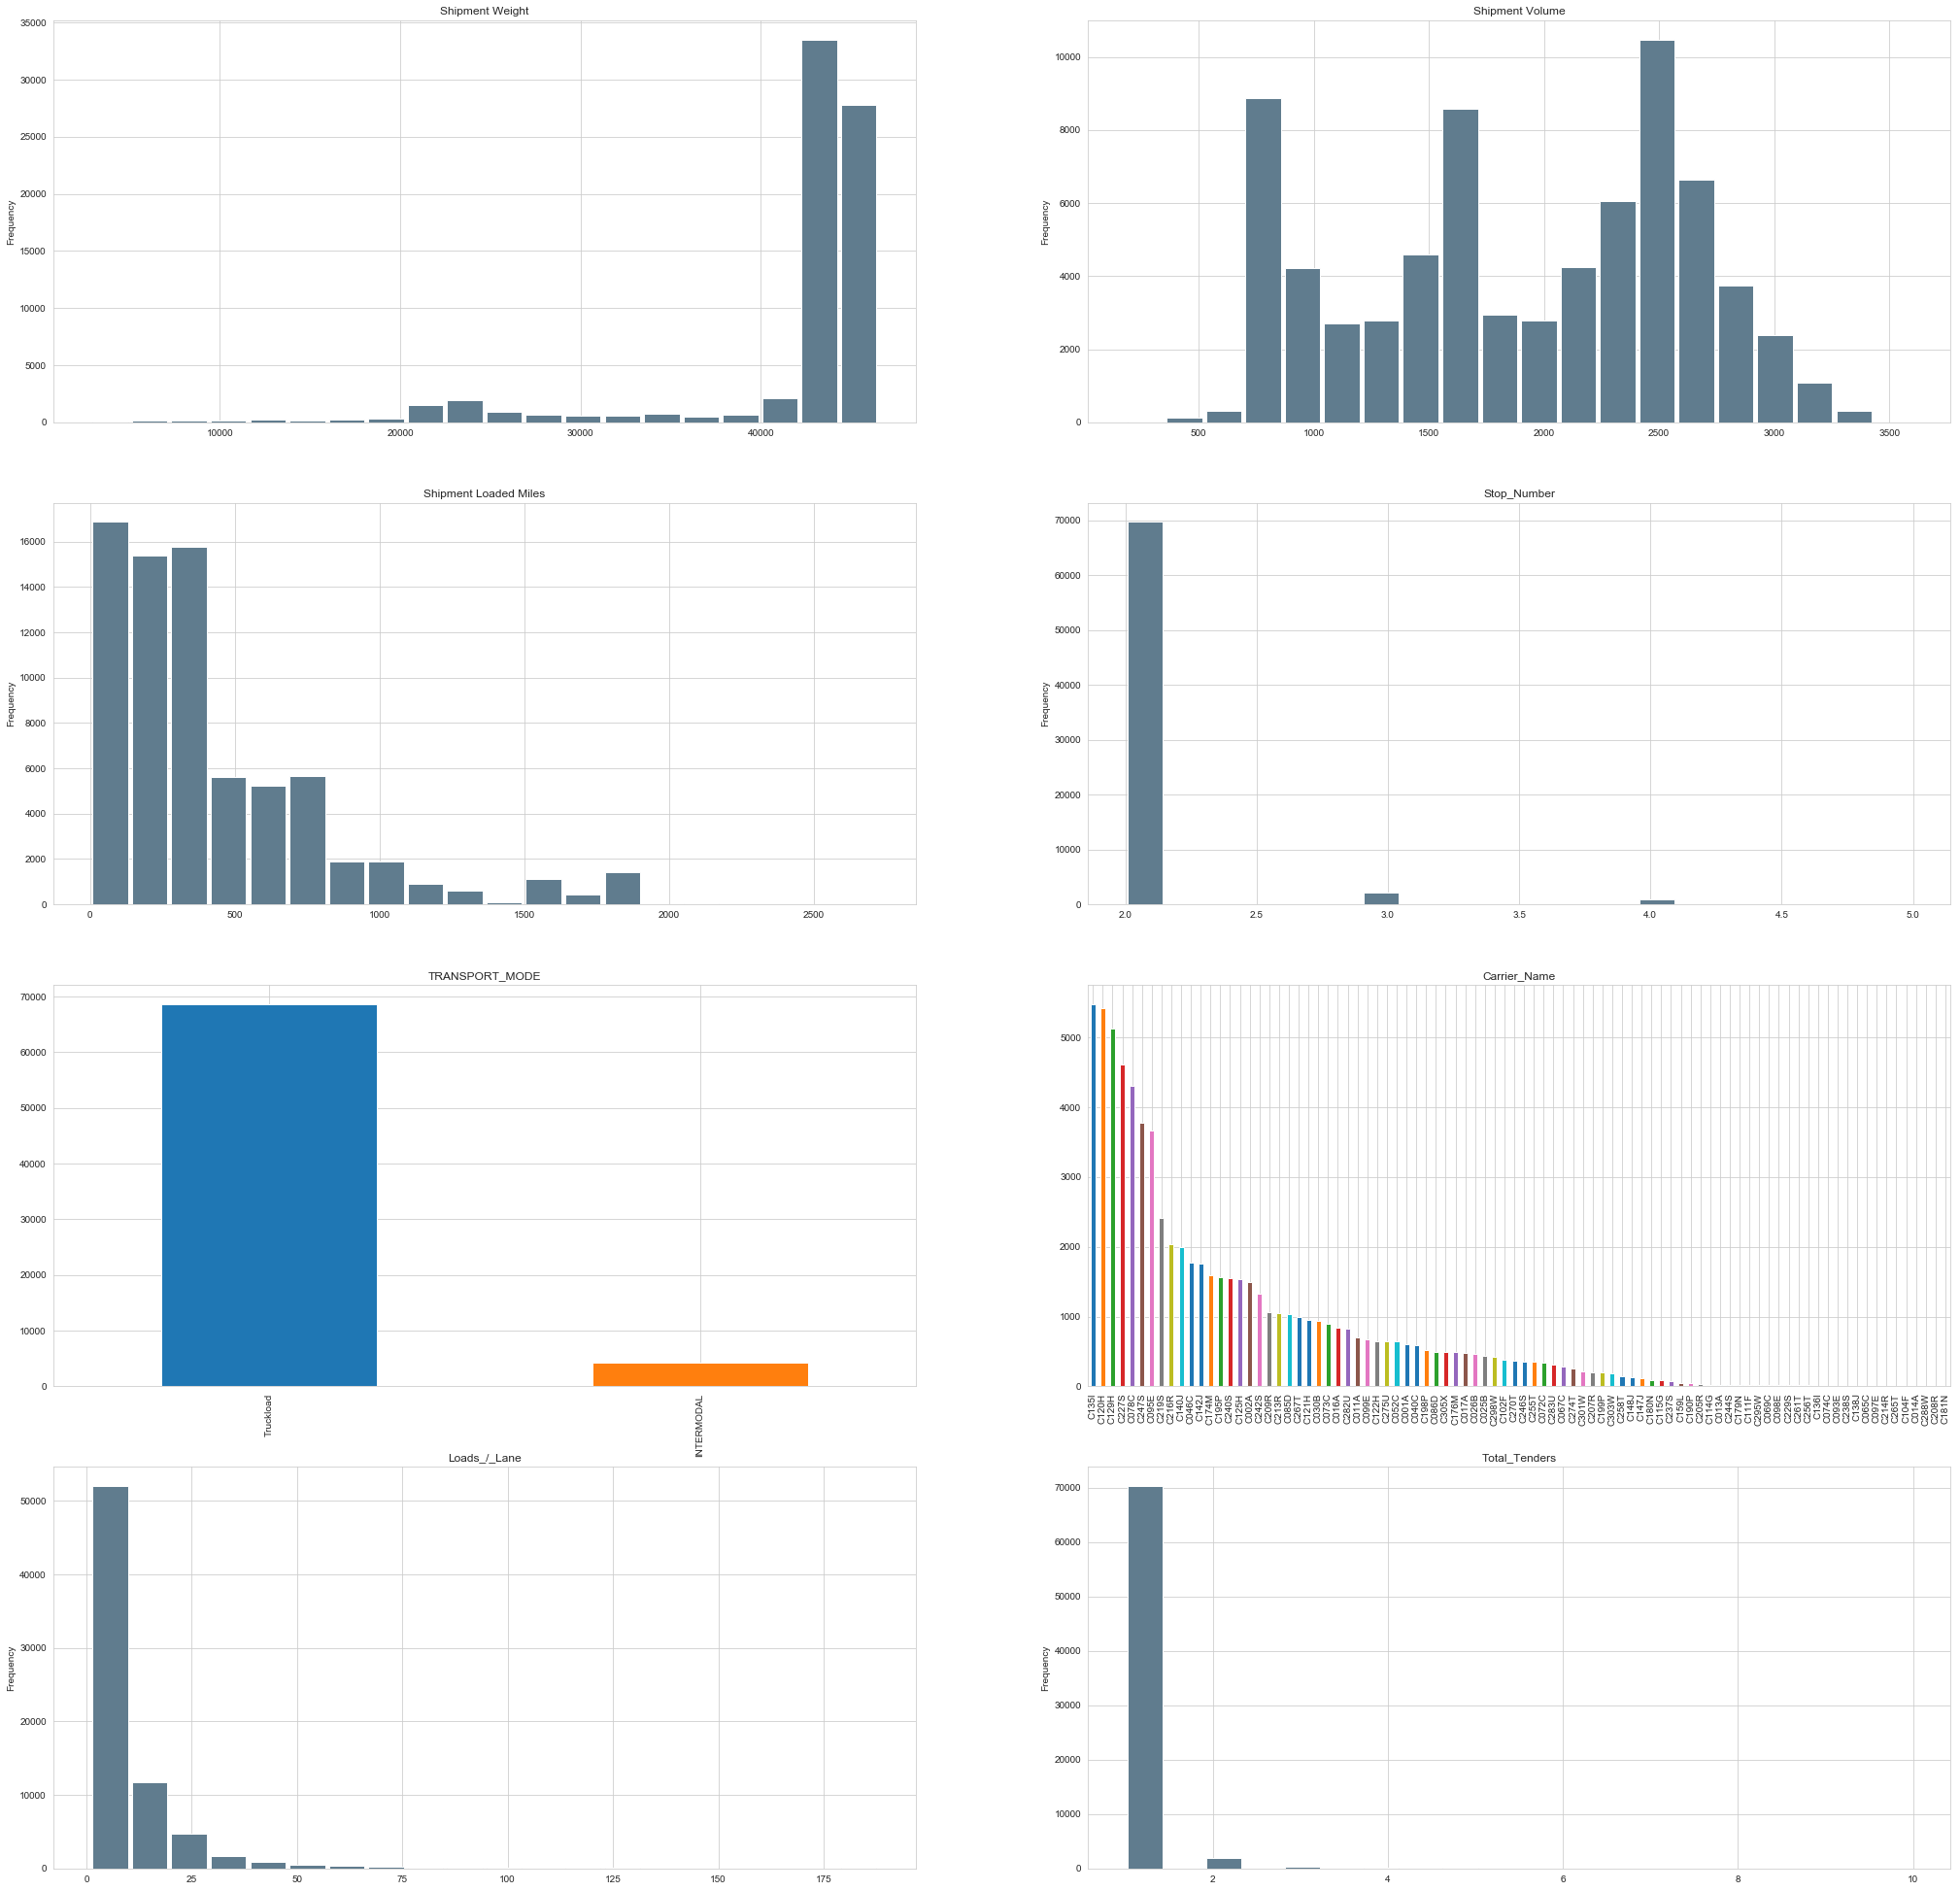

In [73]:
plt.figure(figsize=(35,35))
plt.subplot(4,2,1);data['Shipment_Weight_(lb)'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Shipment Weight')
plt.subplot(4,2,2);data['Shipment_Volume_(cubic_ft)'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Shipment Volume')
plt.subplot(4,2,3);data['Shipment_Loaded_Miles'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Shipment Loaded Miles')
plt.subplot(4,2,4);data['Stop_Number'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Stop_Number')
plt.subplot(4,2,5);data['TRANSPORT_MODE'].value_counts().plot(kind='bar');plt.title('TRANSPORT_MODE')
plt.subplot(4,2,6);data['Carrier_Name'].value_counts().plot(kind='bar');plt.title('Carrier_Name')
plt.subplot(4,2,7);data['Loads_/_Lane'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Loads_/_Lane')
plt.subplot(4,2,8);data['Total_Tenders'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Total_Tenders')






Text(0.5,1,'Destination City')

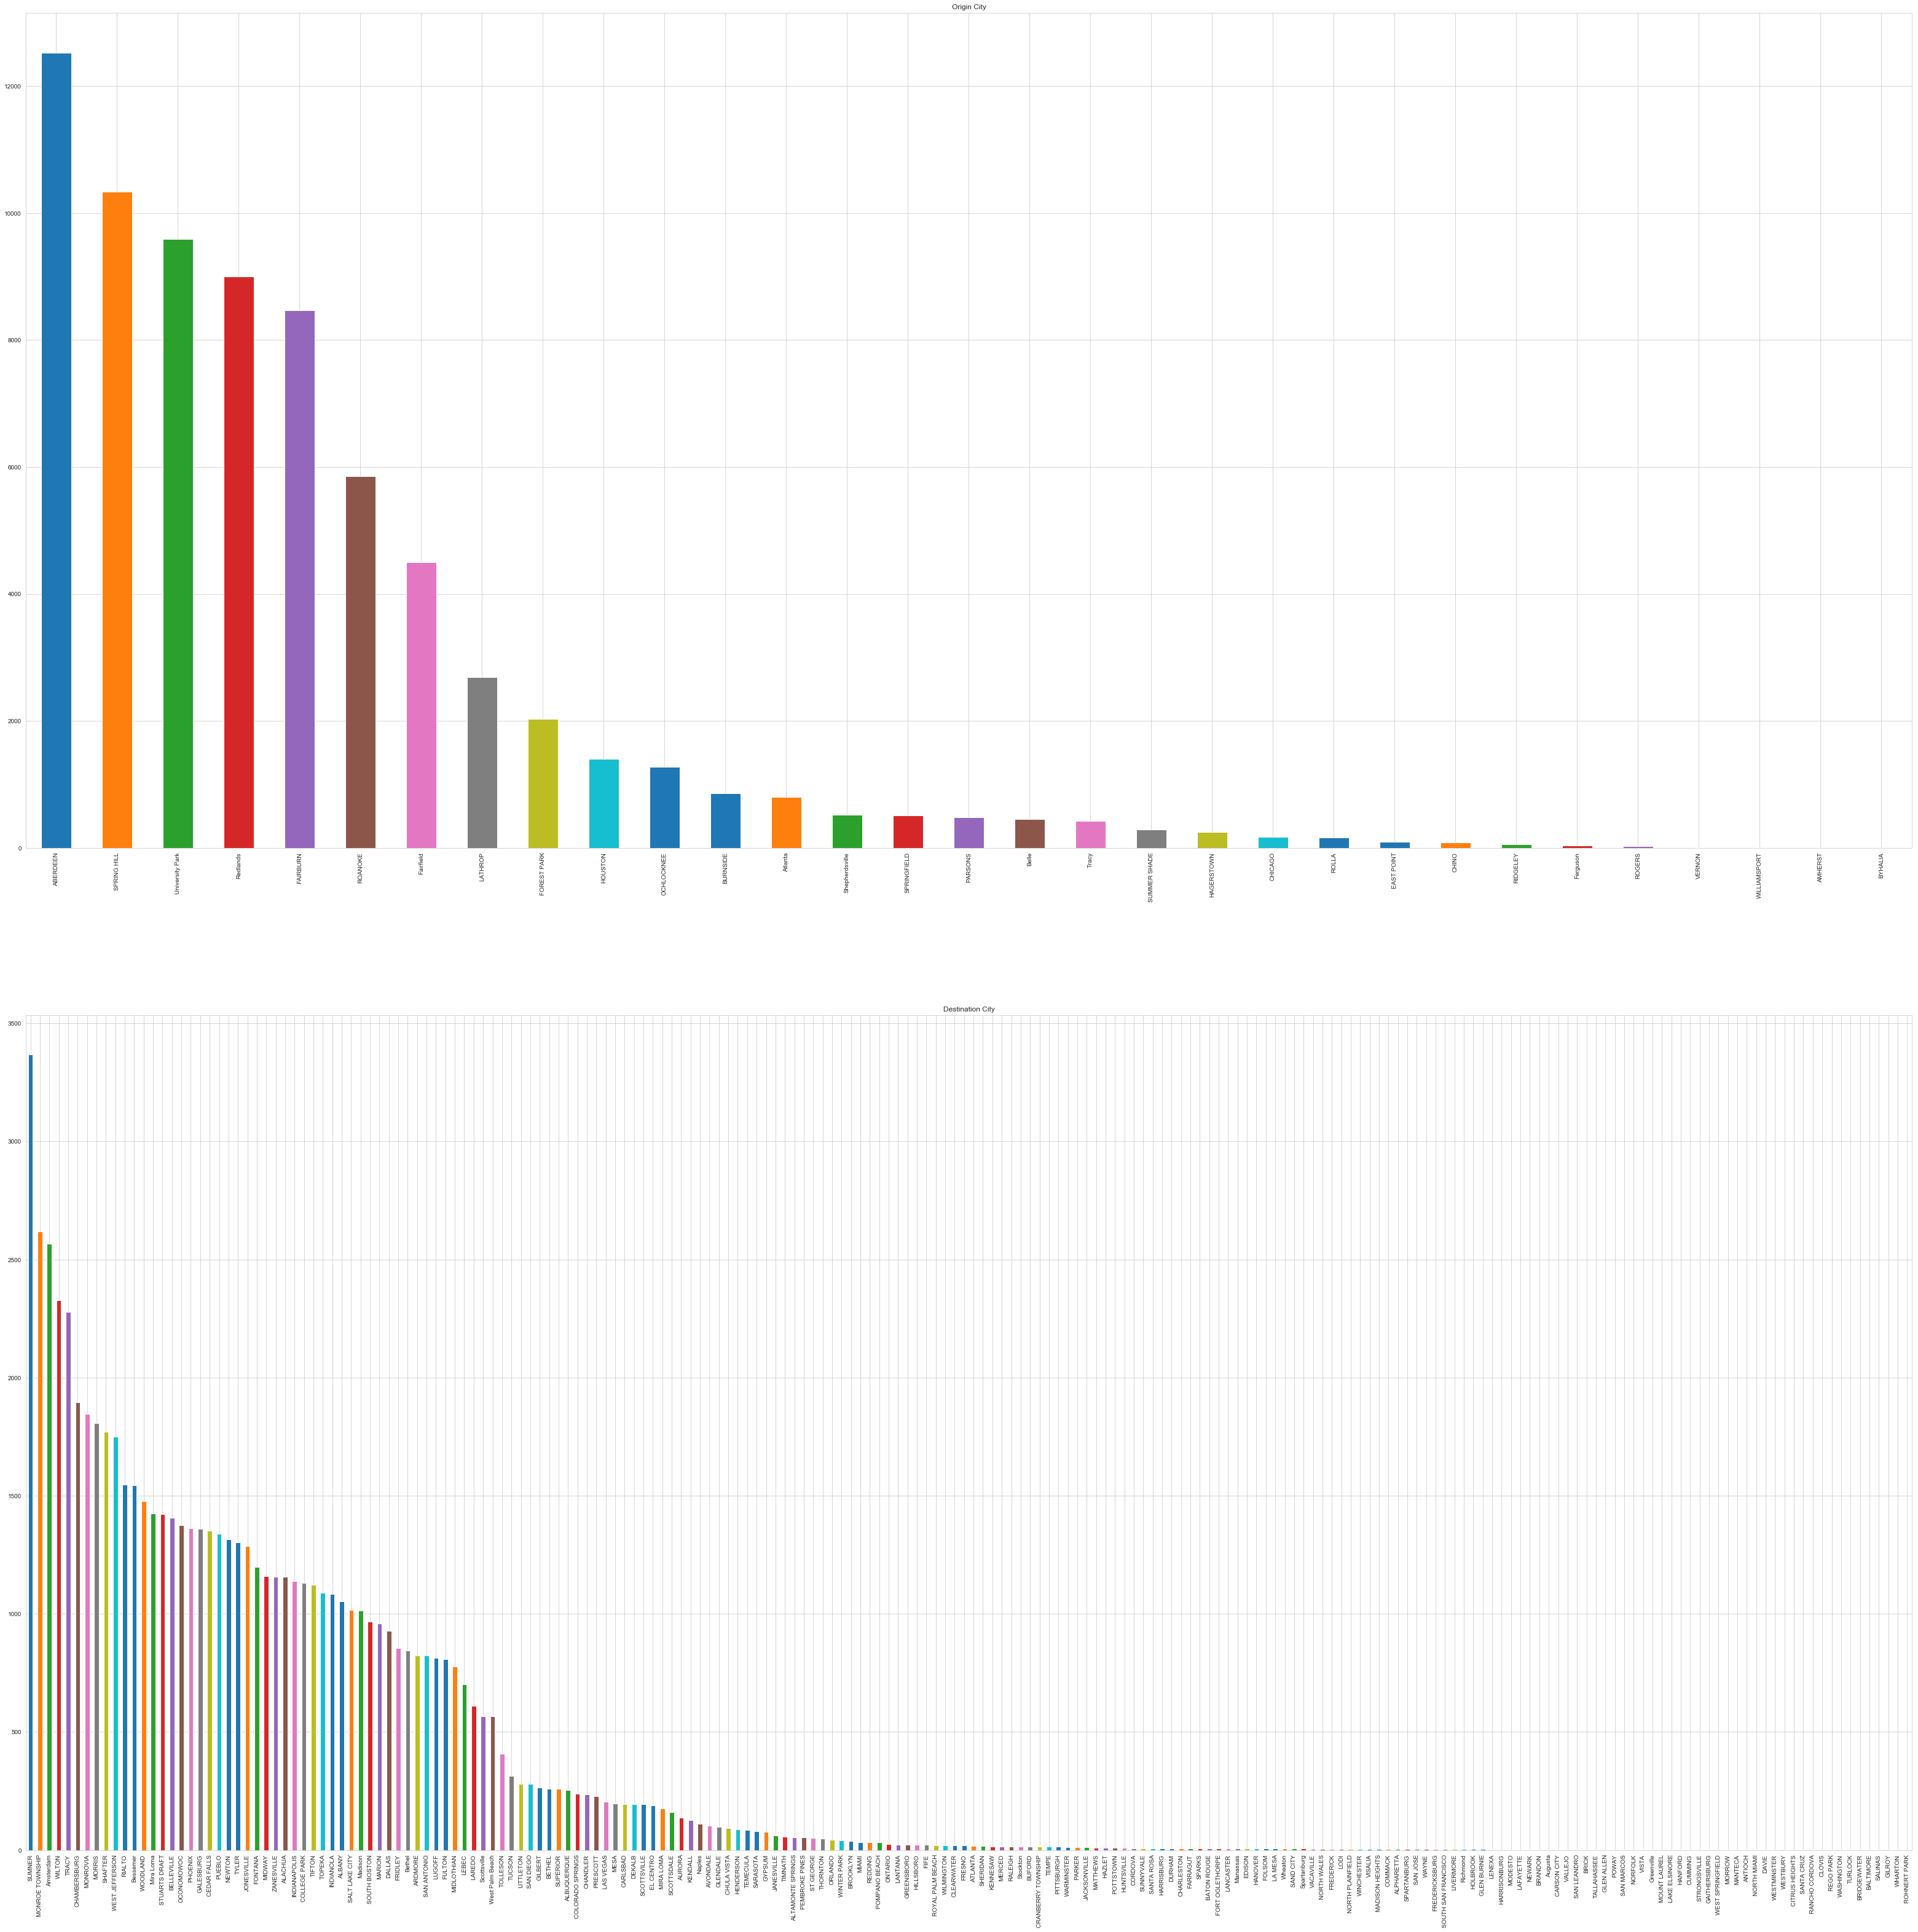

In [74]:
plt.figure(figsize=(55,55))
plt.subplot(2,1,1);data.Origin_City.value_counts().plot(kind='bar');plt.title('Origin City')
plt.subplot(2,1,2);data.Destination_City.value_counts().plot(kind='bar');plt.title('Destination City')


Text(0.5,1,'Destination State')

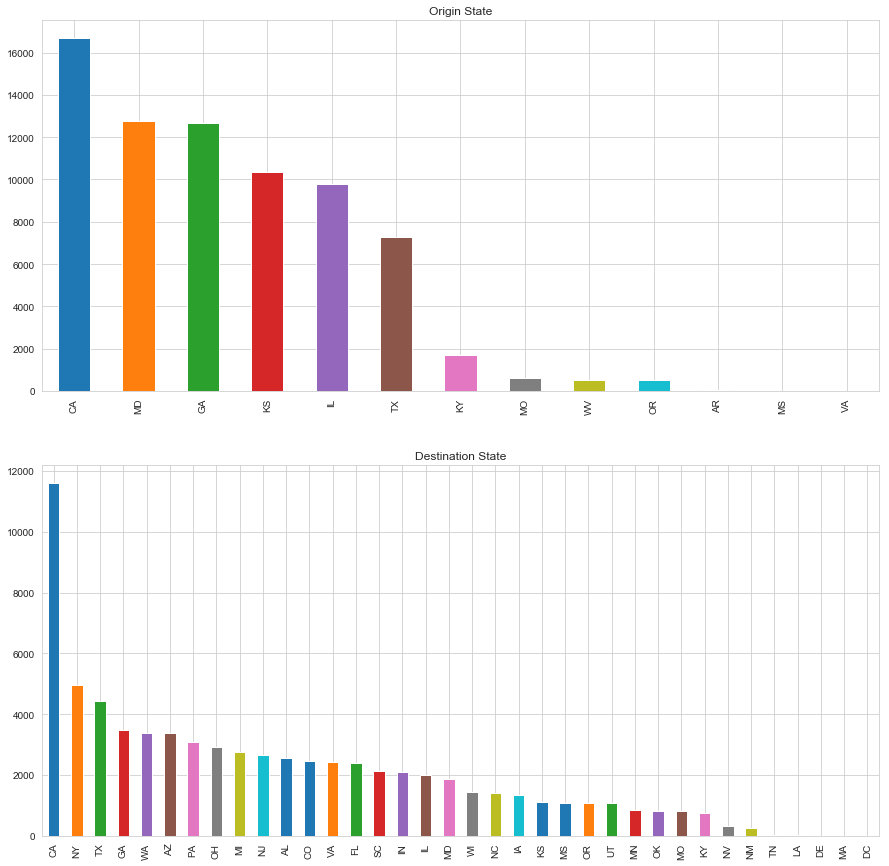

In [75]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1);data.Origin_State.value_counts().plot(kind='bar');plt.title('Origin State')
plt.subplot(2,1,2);data.Destination_State.value_counts().plot(kind='bar');plt.title('Destination State')

In [76]:
data.query("Destination_City=='SUMNER'").Destination_State.head()

36    WA
37    WA
38    WA
39    WA
40    WA
Name: Destination_State, dtype: object